# Data Cleaning



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report


# upload data
df = pd.read_csv('datacopy.csv')


### Let's drop colums that we won't use, duplicates and NaN rows

In [72]:
# drop colums "CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType" <- (this one
# will be too complicated to analise), "PurchaseInfluence", "BuyNewTool", "LanguageWantToWorkWith",
# "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", 
# "WebframeHaveWorkedWith", "WebframeWantToWorkWith", "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith",
# "ToolsTechHaveWorkedWith" <- (this one will be complicated to like split and analyse, but if we have 
# time, we can try), "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith", "NEWCollabToolsWantToWorkWith", 
# "OpSysProfessional use", "OpSysPersonal use", "VersionControlSystem", "VCInteraction", "VCHostingPersonal use",
# "VCHostingProfessional use", "OfficeStackAsyncHaveWorkedWith", "OfficeStackAsyncWantToWorkWith", 
# "OfficeStackSyncHaveWorkedWith", "OfficeStackSyncWantToWorkWith", "Blockchain", "NEWSOSites", "SOVisitFreq", 
# "SOAccount", "SOPartFreq", "SOComm", "TBranch", "ICorPM", "Knowledge_1", "Knowledge_2", "Knowledge_3",
# "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", "Frequency_1", "Frequency_2", "Frequency_3", 
# "TimeSearching", "TimeAnswering", "Onboarding", "ProfessionalTech", "TrueFalse_1", TrueFalse_2", TrueFalse_3"
# "SurveyLength", "SurveyEase", "CompTotal", "CompFreq", "Currency"

df.drop(columns=["CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType",
                         "PurchaseInfluence", "BuyNewTool", "LanguageWantToWorkWith","DatabaseHaveWorkedWith", "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith", "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith",
                        "ToolsTechHaveWorkedWith","ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                        "NEWCollabToolsWantToWorkWith","OpSysProfessional use", "OpSysPersonal use",
                        "VersionControlSystem", "VCInteraction", "VCHostingPersonal use",
                        "VCHostingProfessional use", "OfficeStackAsyncHaveWorkedWith", "OfficeStackAsyncWantToWorkWith",
                        "OfficeStackSyncHaveWorkedWith", "OfficeStackSyncWantToWorkWith", "Blockchain", "NEWSOSites", "SOVisitFreq",
                        "SOAccount", "SOPartFreq", "SOComm", "TBranch", "ICorPM", "Knowledge_1", "Knowledge_2", "Knowledge_3",
                        "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", "Frequency_1", "Frequency_2", "Frequency_3",
                        "TimeSearching", "TimeAnswering", "Onboarding", "ProfessionalTech", "TrueFalse_1", "TrueFalse_2", "TrueFalse_3",
                        "SurveyLength", "SurveyEase","CompTotal", "CompFreq","Currency"], inplace=True)



In [73]:
#remove duplicates if we have any(we don't)
df = df.drop_duplicates()

In [74]:
# removing colums that contain at least one NaN value
df = df.dropna()

### Replacing string values in the columns with numericals ones + desplaying unique values + convert values to int


In [75]:
#let's display all unique values in MainBranch column
print('MainBranch: ', df['MainBranch'].unique())

MainBranch:  ['I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a developer by profession']


In [76]:
df.loc[:,'MainBranch'] = pd.factorize(df['MainBranch'])[0] + 1
df['MainBranch'] = df['MainBranch'].astype(int)

In [77]:
#let's display all unique values in MainBranch column
print('MainBranch: ', df['MainBranch'].unique())

MainBranch:  [1 2]


In [78]:
#let's display all unique values in MainBranch column
print('Employment: ', df['Employment'].unique())

Employment:  ['Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Employed, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, part-time;Retired' 'Employed, full-time;Retired'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired']


In [79]:
df.loc[:,'Employment'] = pd.factorize(df['Employment'])[0] + 1
df['Employment'] = df['Employment'].astype(int)

In [80]:
#let's display all unique values in MainBranch column
print('Employment: ', df['Employment'].unique())


Employment:  [ 1  2  3  4  5  6  7  8  9 10]


In [81]:
#let's display all unique values in 'RemoteWork' column
print('RemoteWork: ', df['RemoteWork'].unique())

RemoteWork:  ['Fully remote' 'Hybrid (some remote, some in-person)' 'Full in-person']


In [82]:
df.loc[:,'RemoteWork'] = pd.factorize(df['RemoteWork'])[0] + 1

In [83]:
#let's display all unique values in 'RemoteWork' column
print('RemoteWork: ', df['RemoteWork'].unique())
df['RemoteWork'] = df['RemoteWork'].astype(int)

RemoteWork:  [1 2 3]


In [84]:
#let's display all unique values in 'EdLevel' column
print('EdLevel: ', df['EdLevel'].unique())

EdLevel:  ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' 'Something else'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Some college/university study without earning a degree'
 'Other doctoral degree (Ph.D., Ed.D., etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Primary/elementary school'
 'Professional degree (JD, MD, etc.)']


In [85]:
df.loc[:,'EdLevel'] = pd.factorize(df['EdLevel'])[0] + 1
df['EdLevel'] = df['EdLevel'].astype(int)

In [86]:
#let's display all unique values in 'EdLevel' column
print('EdLevel: ', df['EdLevel'].unique())

EdLevel:  [1 2 3 4 5 6 7 8 9]


In [87]:
#let's display all unique values in 'YearsCode' column
print('YearsCode: ', df['YearsCode'].unique())

YearsCode:  ['12' '11' '5' '25' '16' '20' '27' '24' '6' '3' '4' '40' '7' '9' '17' '10'
 '29' '13' '30' '26' '32' '14' '15' '8' '28' '19' '23' '48' '38' '21' '18'
 '22' '43' '31' '35' '39' '2' '42' '1' '45' '33' 'Less than 1 year' '34'
 '36' '37' '41' '44' 'More than 50 years' '46' '47' '50' '49']


In [88]:
# let's group all year of code into 5 groups: less than 5 year, from 5 to 10, from 11 to 20, from 21 to 40 
# and more than 40

def process_age(age):
    if age == 'Less than 1 year':
        return 1
    elif age == 'More than 50 years':
        return (5)
    age = int(age)
    if age <5:
        return(1)
    elif (age >= 5 and age <=10):
        return(2)
    elif (age>10 and age <=20):
        return (3)
    elif (age>20 and age <=40):
        return (4)
    else:
        return(5)

# Apply the function to the column and create a new column
df.loc[:,'YearsCode'] = df['YearsCode'].apply(process_age)

In [89]:
print('YearsCode: ', df['YearsCode'].unique())

YearsCode:  [3 2 4 1 5]


In [90]:
#let's display all unique values in 'Country' column
print('Country: ', df['Country'].unique())

Country:  ['United States of America' 'Italy' 'Canada' 'Germany' 'Ireland' 'Poland'
 'Israel' 'Madagascar' 'Norway' 'Netherlands' 'Brazil' 'France' 'Uruguay'
 'United Kingdom of Great Britain and Northern Ireland' 'Spain' 'Sweden'
 'Romania' 'India' 'Greece' 'Portugal' 'Czech Republic' 'Kenya' 'Latvia'
 'Austria' 'South Africa' 'China' 'Slovakia' 'Denmark' 'Australia'
 'Viet Nam' 'Finland' 'Argentina' 'Hungary' 'Tunisia' 'Switzerland'
 'Bangladesh' 'Ukraine' 'Maldives' 'Thailand' 'Hong Kong (S.A.R.)'
 'Mexico' 'Serbia' 'Belgium' 'Egypt' 'Croatia' 'Russian Federation'
 'Bosnia and Herzegovina' 'Armenia' 'Iran, Islamic Republic of...'
 'Turkey' 'Belarus' 'Costa Rica' 'Estonia' 'Kazakhstan' 'Morocco'
 'New Zealand' 'Ecuador' 'Bulgaria' 'Japan' 'Peru' 'Philippines'
 'Indonesia' 'Republic of Korea' 'Colombia' 'Lebanon' 'Pakistan'
 'Guatemala' 'Chile' 'Nepal' 'Jordan' 'Azerbaijan' 'Sri Lanka'
 'United Arab Emirates' 'Singapore' 'South Korea' 'Lithuania' 'Taiwan'
 'Saudi Arabia' 'Slovenia' 'N

In [91]:
df.loc[:,'Country'] = pd.factorize(df['Country'])[0] + 1

In [92]:
#let's display all unique values in 'Country' column
print('Country: ', df['Country'].unique())
df['Country'] = df['Country'].astype(int)

Country:  [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155]


In [93]:
#let's display all unique values in 'OrgSize' column
print('OrgSize: ', df['OrgSize'].unique())

OrgSize:  ['20 to 99 employees' '2 to 9 employees' '5,000 to 9,999 employees'
 '100 to 499 employees' '10,000 or more employees'
 'Just me - I am a freelancer, sole proprietor, etc.'
 '500 to 999 employees' '1,000 to 4,999 employees' '10 to 19 employees'
 'I don’t know']


In [94]:
df.loc[:,'OrgSize'] = pd.factorize(df['OrgSize'])[0] + 1

In [95]:
#let's display all unique values in 'OrgSize' column
print('OrgSize: ', df['OrgSize'].unique())
df['OrgSize'] = df['OrgSize'].astype(int)

OrgSize:  [1 2 3 4 5 6 7 8 9 10]


In [96]:
#let's display all unique values in 'Age' column
print('Age: ', df['Age'].unique())

Age:  ['35-44 years old' '25-34 years old' '45-54 years old' '55-64 years old'
 '18-24 years old' '65 years or older' 'Prefer not to say'
 'Under 18 years old']


In [97]:
df.loc[:,'Age'] = pd.factorize(df['Age'])[0] + 1

In [98]:
#let's display all unique values in 'Age' column
print('Age: ', df['Age'].unique())
df['Age'] = df['Age'].astype(int)

Age:  [1 2 3 4 5 6 7 8]


In [99]:
#let's display all unique values in 'Gender' column
print('Gender: ', df['Gender'].unique())

Gender:  ['Man' 'Woman' 'Prefer not to say'
 'Non-binary, genderqueer, or gender non-conforming'
 'Or, in your own words:'
 'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming'
 'Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Non-binary, genderqueer, or gender non-conforming'
 'Man;Or, in your own words:'
 'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming'
 'Man;Woman']


In [100]:
df.loc[:,'Gender'] = pd.factorize(df['Gender'])[0] + 1

In [101]:
#let's display all unique values in 'Gender' column
print('Gender: ', df['Gender'].unique())
df['Gender'] = df['Gender'].astype(int)

Gender:  [1 2 3 4 5 6 7 8 9 10 11 12 13 14]


In [102]:
#let's display all unique values in 'Trans' column
print('Trans: ', df['Trans'].unique())

Trans:  ['No' 'Prefer not to say' 'Yes' 'Or, in your own words:']


In [103]:
df.loc[:,'Trans'] = pd.factorize(df['Trans'])[0] + 1

In [104]:
#let's display all unique values in 'Trans' column
print('Trans: ', df['Trans'].unique())
df['Trans'] = df['Trans'].astype(int)

Trans:  [1 2 3 4]


In [105]:
#let's display all unique values in 'Sexuality' column
print('Sexuality: ', df['Sexuality'].unique())

Sexuality:  ['Straight / Heterosexual' 'Prefer not to say' 'Gay or Lesbian' 'Bisexual'
 'Bisexual;Straight / Heterosexual' 'Queer' 'Prefer to self-describe:'
 'Bisexual;Queer' 'Gay or Lesbian;Queer'
 'Bisexual;Prefer to self-describe:'
 'Straight / Heterosexual;Prefer to self-describe:'
 'Bisexual;Gay or Lesbian;Queer' 'Bisexual;Prefer to self-describe:;Queer'
 'Straight / Heterosexual;Queer'
 'Bisexual;Prefer to self-describe:;Gay or Lesbian'
 'Bisexual;Straight / Heterosexual;Prefer to self-describe:'
 'Bisexual;Gay or Lesbian' 'Prefer to self-describe:;Queer'
 'Bisexual;Straight / Heterosexual;Gay or Lesbian'
 'Prefer to self-describe:;Gay or Lesbian'
 'Bisexual;Straight / Heterosexual;Queer'
 'Bisexual;Straight / Heterosexual;Gay or Lesbian;Queer'
 'Straight / Heterosexual;Gay or Lesbian'
 'Prefer to self-describe:;Gay or Lesbian;Queer'
 'Straight / Heterosexual;Prefer to self-describe:;Queer'
 'Bisexual;Straight / Heterosexual;Prefer to self-describe:;Gay or Lesbian;Queer']


In [106]:
df.loc[:,'Sexuality'] = pd.factorize(df['Sexuality'])[0] + 1
df['Sexuality'] = df['Sexuality'].astype(int)

In [107]:
filtered_ethnicities = df['Ethnicity'].value_counts()[:20].index.tolist()
print(filtered_ethnicities)

df = df[df['Ethnicity'].isin(filtered_ethnicities)]
df.loc[:,'Ethnicity'] = pd.factorize(df['Ethnicity'])[0] + 1

['White', 'European', 'White;European', 'Indian', 'Asian', 'Hispanic or Latino/a', 'South American', 'Middle Eastern', 'White;North American', 'Prefer not to say', 'African', 'South Asian', 'Southeast Asian', 'Or, in your own words:', 'White;South American', 'Indian;Asian', 'White;Hispanic or Latino/a', "I don't know", 'East Asian', 'Hispanic or Latino/a;South American']


In [108]:
#let's display all unique values in 'Ethnicity' column
print('Ethnicity: ', df['Ethnicity'].unique())
df['Ethnicity'] = df['Ethnicity'].astype(int)

Ethnicity:  [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]


In [109]:
#df.loc[:,'Ethnicity'] = pd.factorize(df['Ethnicity'])[0] + 1

In [110]:
#let's display all unique values in 'Accessibility' column
print('Accessibility: ', df['Accessibility'].unique())

Accessibility:  ['None of the above' 'I am deaf / hard of hearing' 'Prefer not to say'
 'Or, in your own words:' 'I am blind / have difficulty seeing'
 'I am deaf / hard of hearing;I am unable to / find it difficult to walk or stand without assistance'
 'I am unable to / find it difficult to type'
 'I am unable to / find it difficult to walk or stand without assistance'
 'I am deaf / hard of hearing;I am blind / have difficulty seeing'
 'Or, in your own words:;I am unable to / find it difficult to walk or stand without assistance'
 'I am blind / have difficulty seeing;I am unable to / find it difficult to walk or stand without assistance'
 'I am blind / have difficulty seeing;I am unable to / find it difficult to type'
 'I am unable to / find it difficult to type;I am unable to / find it difficult to walk or stand without assistance'
 'Or, in your own words:;I am blind / have difficulty seeing'
 'I am deaf / hard of hearing;I am unable to / find it difficult to type'
 'I am deaf / hard

In [111]:
df.loc[:,'Accessibility'] = pd.factorize(df['Accessibility'])[0] + 1
df['Accessibility'] = df['Accessibility'].astype(int)

In [112]:
#let's display all unique values in 'MentalHealth' column
print('MentalHealth: ', df['MentalHealth'].unique())

MentalHealth:  ['I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)'
 'None of the above'
 'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder'
 'I have an anxiety disorder'
 'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)'
 'Prefer not to say'
 "I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have learning differences (e.g., Dyslexic, Dyslexia, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)"
 'I have an anxiety disorder;I have a concentration and/or memory disorder (e.g., ADHD, etc.)'
 'I have a concentration and/or memory disorder (e.g., ADHD, etc.)'
 "I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)"
 'Or, in your own words:;I have a concentration and/or memory disorder (e.g., ADHD, etc.)'
 'I have a mood or emotional disorder (e.g., depression, bipolar disord

In [113]:
df.loc[:,'MentalHealth'] = pd.factorize(df['MentalHealth'])[0] + 1
df['MentalHealth'] = df['MentalHealth'].astype(int)

In [114]:
#let's display all unique values in 'WorkExp' column
print('WorkExp: ', df['WorkExp'].unique())

WorkExp:  [14.  5.  4. 23.  9. 22. 21.  6.  3. 28.  7.  8.  2. 20. 27. 19.  1. 10.
 13. 30. 12. 15. 11. 17. 25. 18. 24. 31.  0. 40. 16. 35. 32. 36. 42. 38.
 29. 33. 26. 37. 34. 41. 44. 50. 46. 45. 39. 43. 47. 48. 49.]


In [115]:
# let's group all year of work experiece into 5 groups: less than 5 year, from 5 to 10, from 11 to 20, from 21 to 40 
# and more than 40

def process_age(age):
    age = int(age)
    age = int(age)
    if age <5:
        return(0)
    elif (age >= 5 and age <=10):
        return(1)
    elif (age>10 and age <=20):
        return (2)
    elif (age>20 and age <=40):
        return (3)
    else:
        return(4)

# Apply the function to the column and create a new column
df.loc[:,'WorkExp'] = df['WorkExp'].apply(process_age)

In [116]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].astype(int)

In [117]:
df.dtypes

ResponseId                  int64
MainBranch                  int64
Employment                  int64
RemoteWork                  int64
EdLevel                     int64
YearsCode                  object
YearsCodePro               object
OrgSize                     int64
Country                     int64
LanguageHaveWorkedWith     object
Age                         int64
Gender                      int64
Trans                       int64
Sexuality                   int64
Ethnicity                   int64
Accessibility               int64
MentalHealth                int64
WorkExp                   float64
ConvertedCompYearly         int64
dtype: object

In [118]:
df

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,LanguageHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,WorkExp,ConvertedCompYearly
11,12,1,1,1,1,3,10,1,1,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,1,1,1,1,1,1,1,2.0,194400
12,13,2,2,2,1,3,5,2,1,C;HTML/CSS;Rust;SQL;Swift;TypeScript,2,1,1,1,1,1,2,1.0,65000
14,15,2,1,1,2,3,5,3,1,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,2,1,1,1,1,1,2,1.0,110000
21,22,2,2,2,2,2,4,1,2,Python;SQL;TypeScript,2,1,1,1,2,1,2,0.0,34126
22,23,2,2,1,3,4,20,4,3,C#;SQL;TypeScript,1,1,1,1,3,1,2,3.0,97605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73110,73111,2,2,1,1,3,9,1,3,C#;HTML/CSS;JavaScript;TypeScript,2,2,1,1,3,1,2,1.0,60906
73112,73113,2,2,2,1,2,3,5,24,HTML/CSS;Java;JavaScript,2,1,1,1,2,1,2,0.0,52255
73113,73114,2,2,1,2,2,5,5,1,C;C#;C++,2,1,1,1,1,1,9,1.0,94000
73116,73117,2,2,2,1,4,16,9,1,C#;HTML/CSS;Java;JavaScript,1,1,1,1,1,1,2,2.0,115000


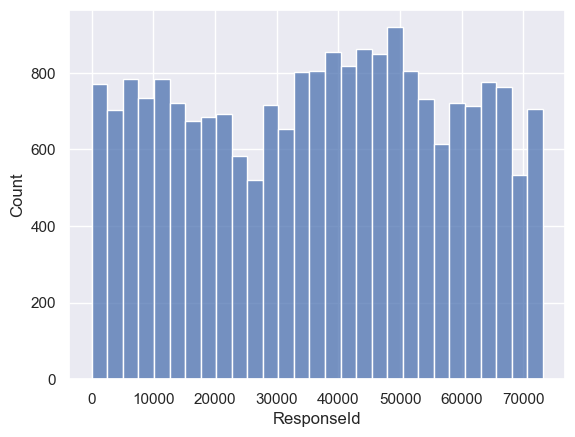

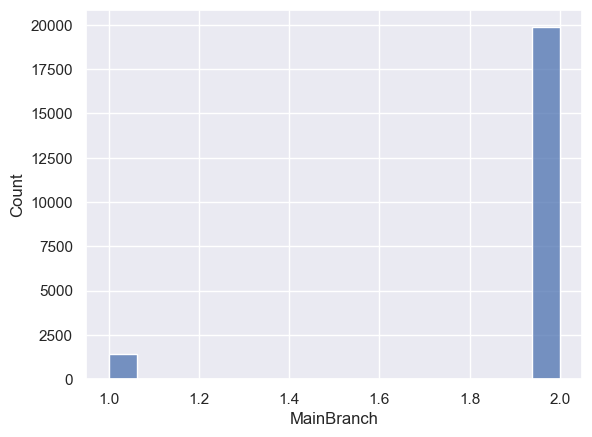

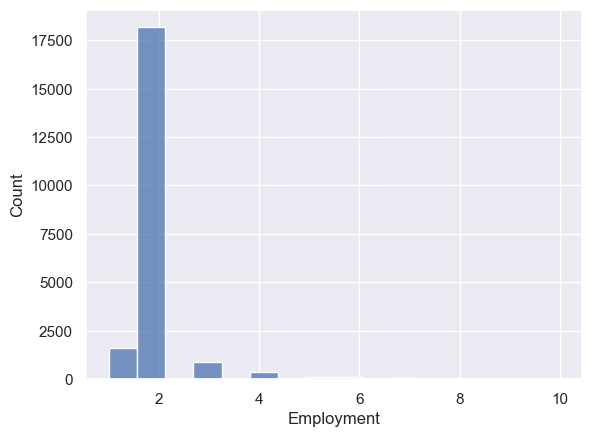

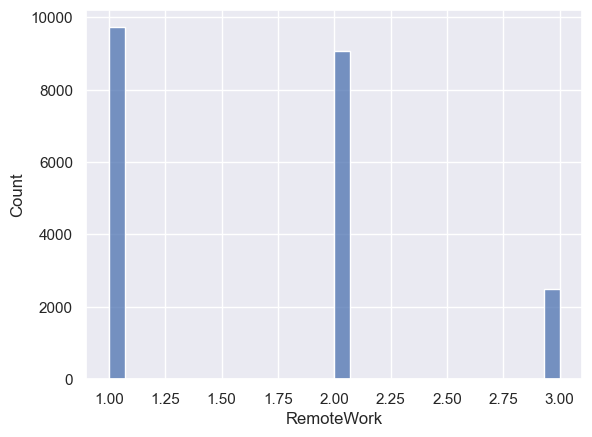

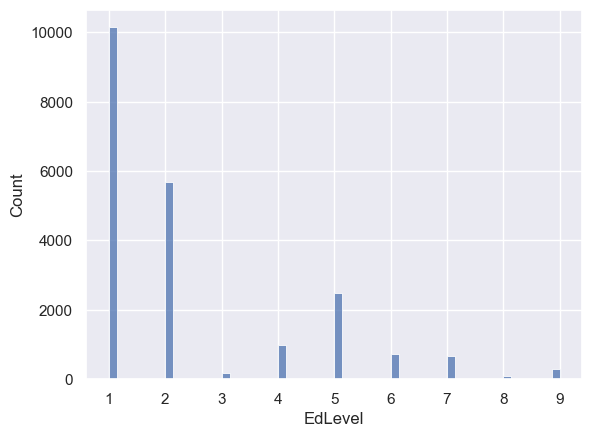

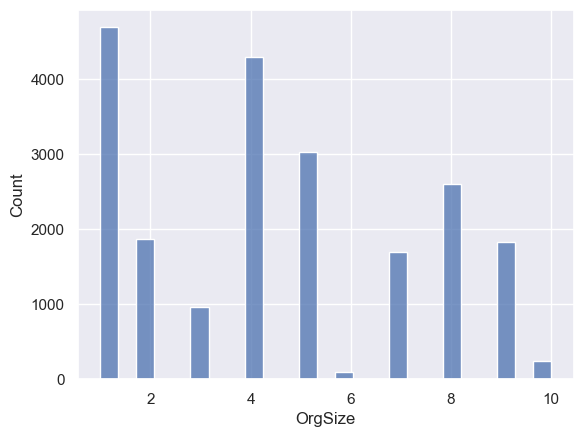

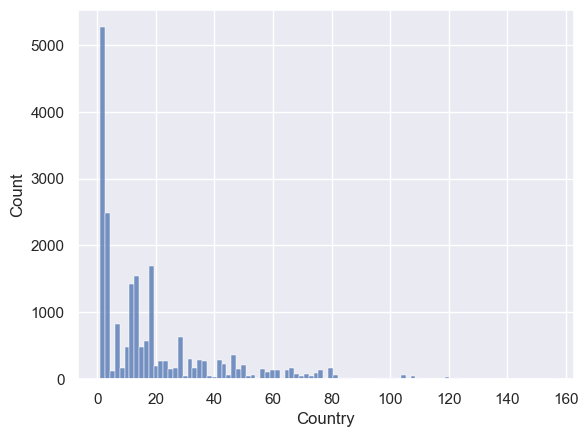

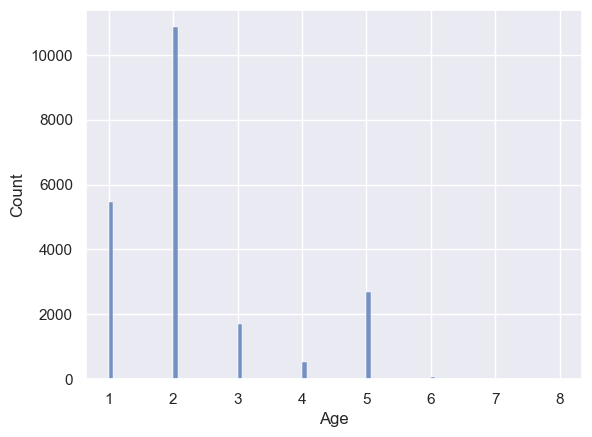

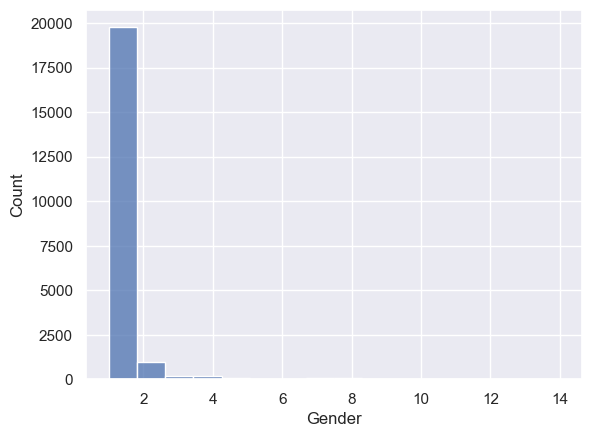

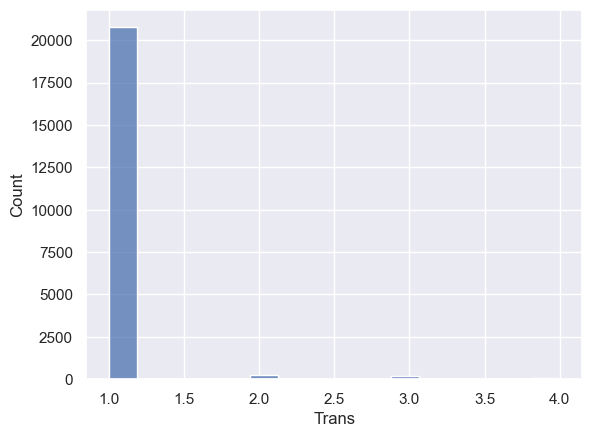

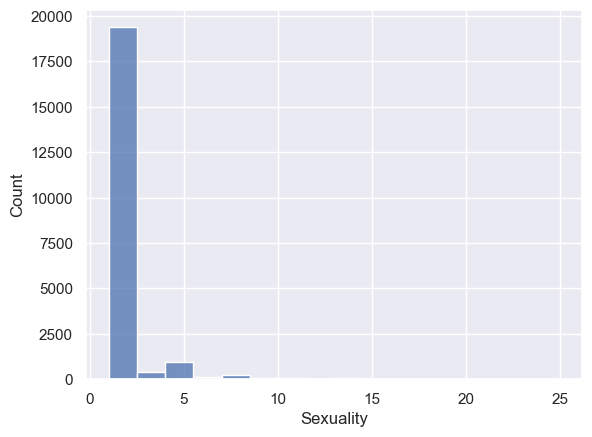

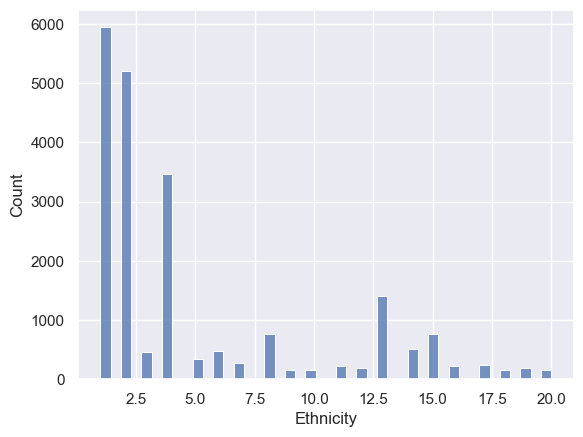

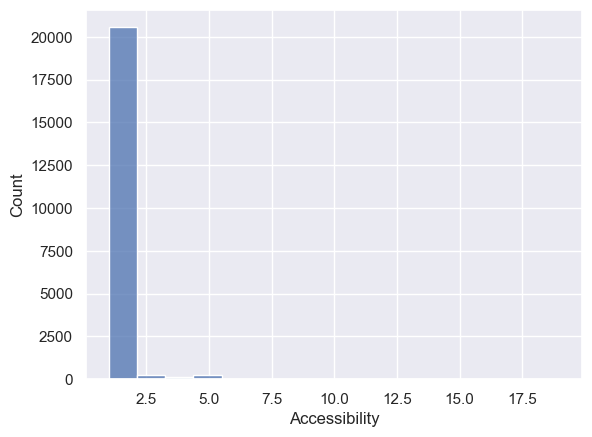

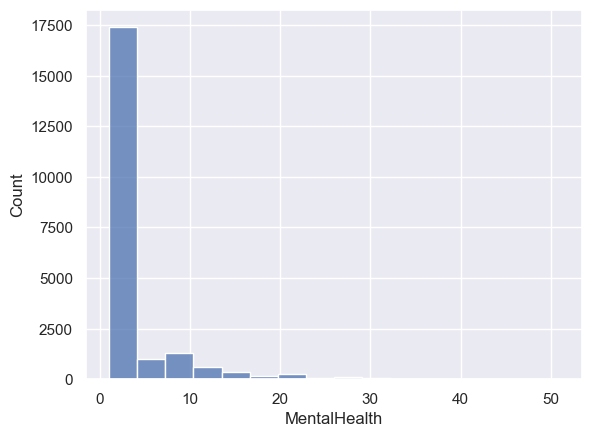

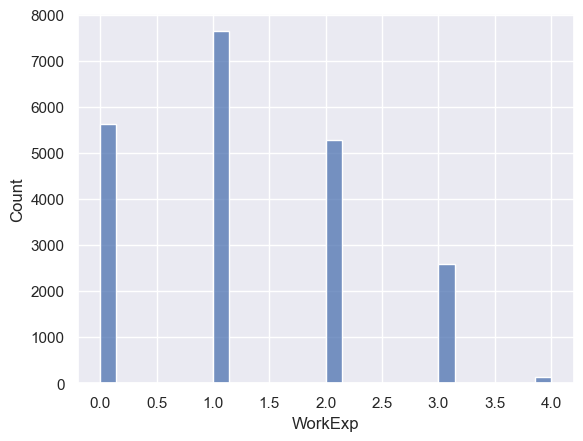

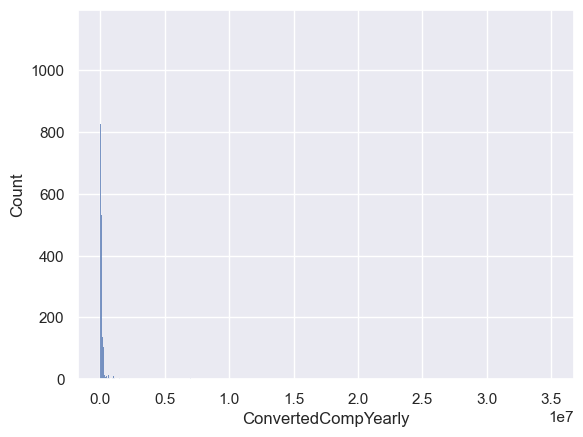

In [119]:
# make historgram to understand the distibution

for i in df.select_dtypes(include = "number").columns:
    sns.histplot( data = df, x = i)
    plt.show()

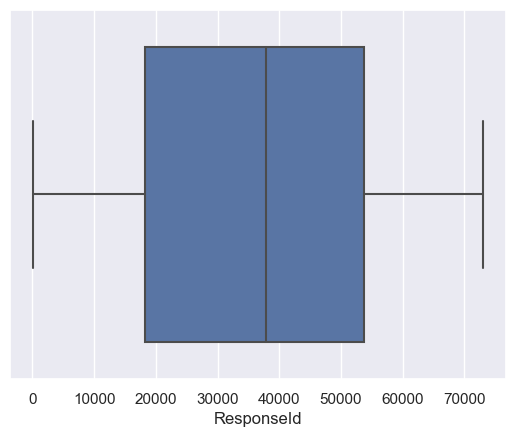

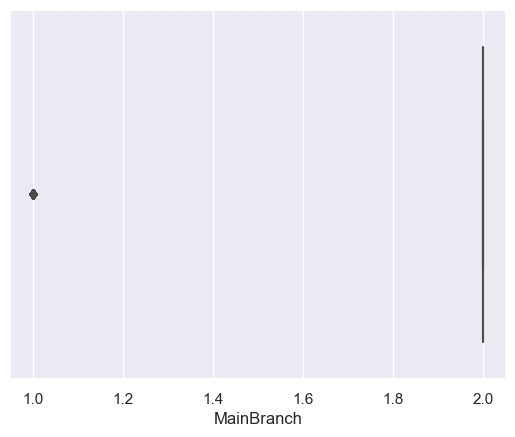

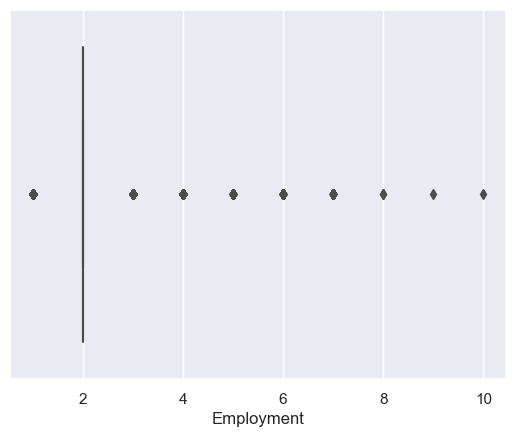

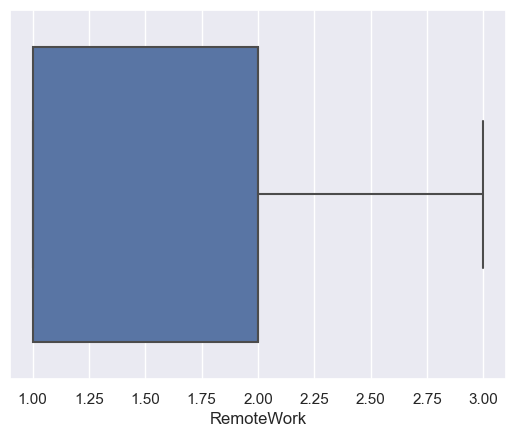

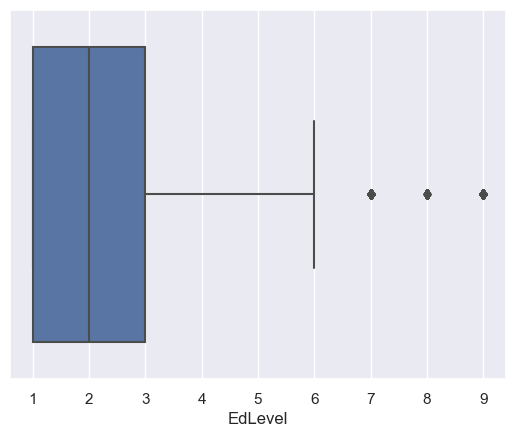

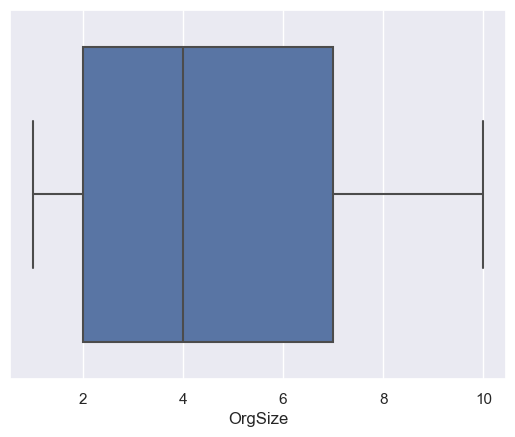

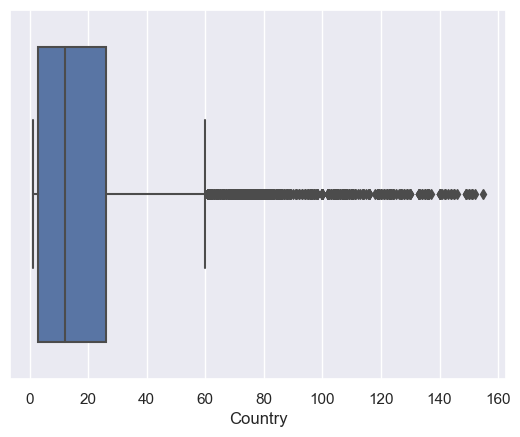

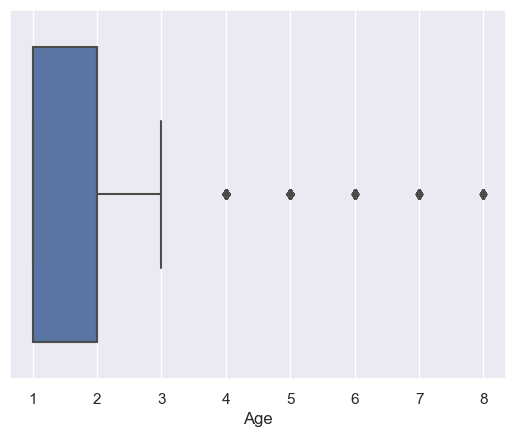

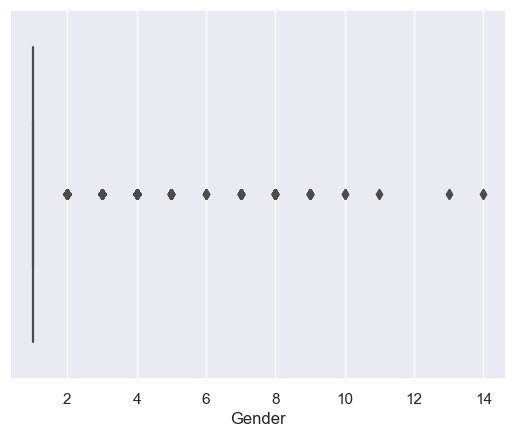

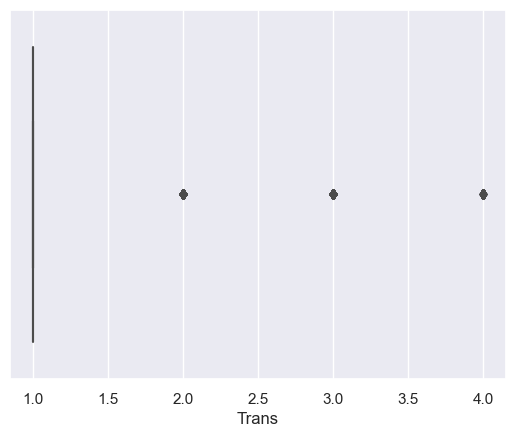

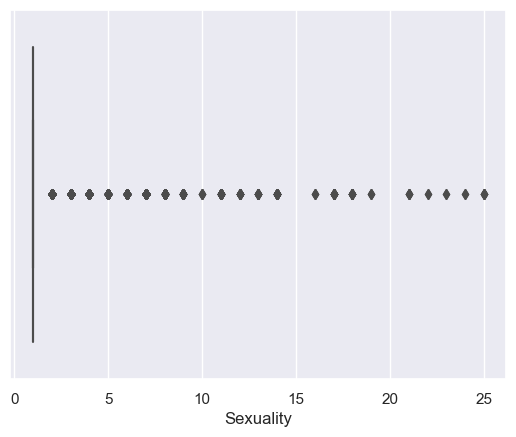

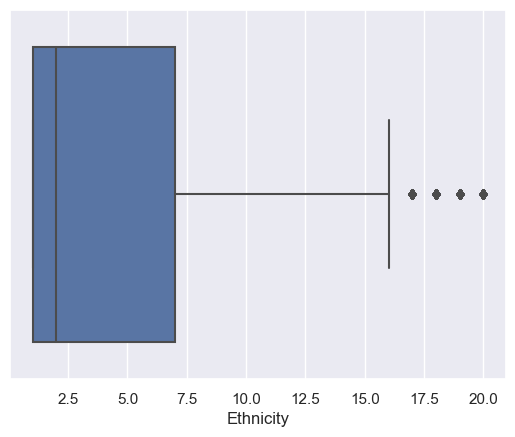

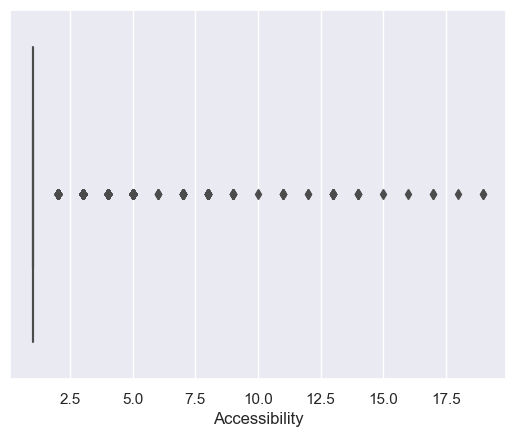

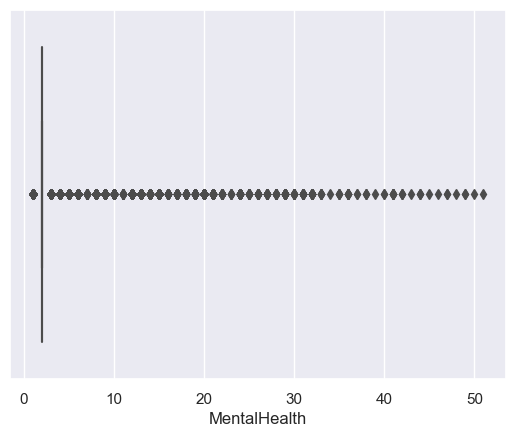

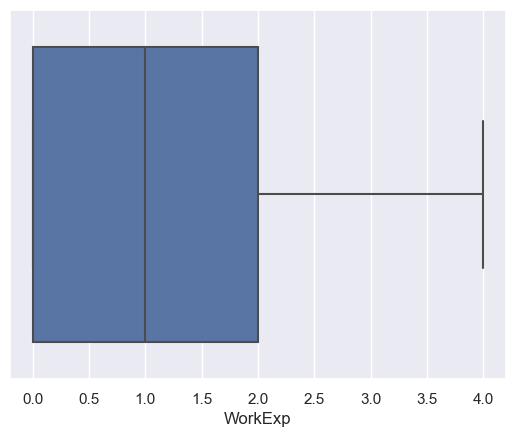

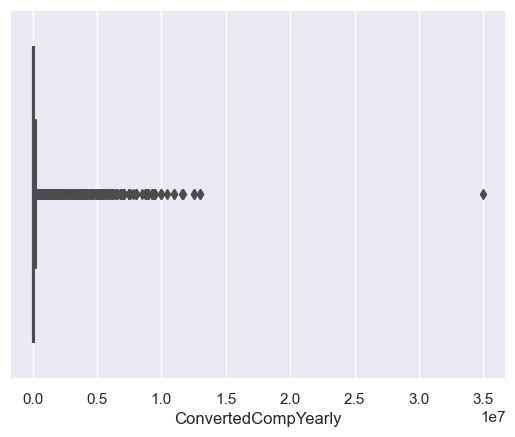

In [120]:
# boxplot to identify Outliers

for i in df.select_dtypes(include = "number").columns:
    sns.boxplot( data = df, x = i)
    plt.show()

## Let's work with "ConvertedCompYearly" as it has the most outliers

## Capping outliers

In [121]:
df[['ConvertedCompYearly']].describe()

,ConvertedCompYearly
count,2.129000e+04
mean,1.591257e+05
std,6.332335e+05
min,1.000000e+00
25%,3.637200e+04
50%,6.704400e+04
75%,1.171260e+05
max,3.500000e+07


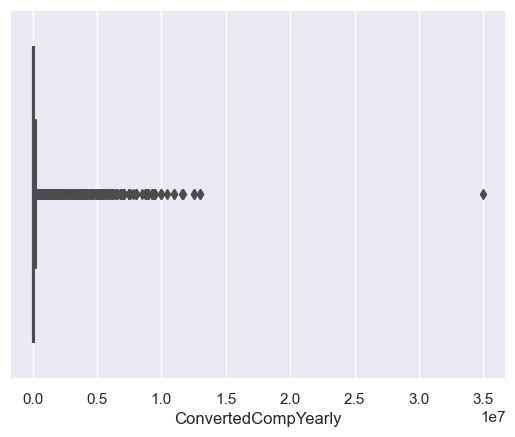

In [122]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df['ConvertedCompYearly'])
plt.show()

In [123]:
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1

up_lim = q3 + (1.5 * iqr)
low_lim = q1 - (1.5*iqr)

#capping this data

df.loc[(df['ConvertedCompYearly'] > up_lim), 'ConvertedCompYearly'] = up_lim
df.loc[(df['ConvertedCompYearly'] < low_lim), 'ConvertedCompYearly'] = low_lim

In [124]:
df[['ConvertedCompYearly']].describe()

,ConvertedCompYearly
count,21290.000000
mean,84866.091686
std,65422.239803
min,1.000000
25%,36372.000000
50%,67044.000000
75%,117126.000000
max,238257.000000


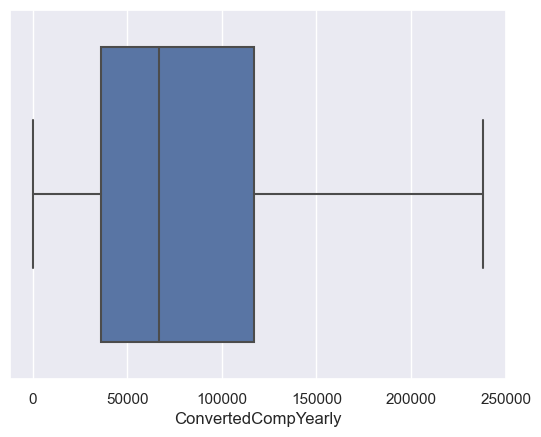

In [125]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df['ConvertedCompYearly'])
plt.show()

### The following 2 functions will make new columns with the names of all languages and write 1, if person knows this language and 0 otherwise

In [126]:
# function that return 1 person knows each language in the list and 0 otherwise
def process_list(lst):
    languages = ['C#', 'C', 'HTML/CSS', 'Python' ,'Dart' ,'Bash/Shell' ,'JavaScript' ,'Java',
 'Haskell', 'Assembly', 'Go', 'Groovy', 'Crystal' ,'PHP' ,'Delphi' ,'C++',
 'Clojure' ,'Kotlin', 'APL', 'Rust' ,'TypeScript', 'COBOL' ,'PowerShell' ,'Scala',
 'Elixir', 'F#' ,'LISP' ,'Ruby', 'Julia' ,'MATLAB', 'Objective-C' ,'Erlang',
 'Swift', 'Fortran', 'OCaml' ,'R' ,'SQL', 'Perl' ,'Lua' ,'VBA']
    result = ""
    lst = lst.split(';')
    for lang in languages:
        if lang in lst:
            result += "1,"
        else:
            result += "0,"
    return result[:-1]  # Remove the trailing comma


# Apply the function to the column and create a new column
df.loc[:,'new_column'] = df['LanguageHaveWorkedWith'].apply(process_list)

In [127]:
## add new colums with languges names


# Specifying the column names
column_names = ['C#', 'C', 'HTML/CSS', 'Python', 'Dart', 'Bash/Shell', 'JavaScript', 'Java',
                'Haskell', 'Assembly', 'Go', 'Groovy', 'Crystal', 'PHP', 'Delphi', 'C++',
                'Clojure', 'Kotlin', 'APL', 'Rust', 'TypeScript', 'COBOL', 'PowerShell',
                'Scala', 'Elixir', 'F#', 'LISP', 'Ruby', 'Julia', 'MATLAB', 'Objective-C',
                'Erlang', 'Swift', 'Fortran', 'OCaml', 'R', 'SQL', 'Perl', 'Lua', 'VBA']


# Splitting the 'new_column' and assigning to the new DataFrame
df[column_names] = df['new_column'].str.split(',', expand=True)

df[column_names] = df[column_names].astype(int)

In [128]:
df

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,LanguageHaveWorkedWith,...,Objective-C,Erlang,Swift,Fortran,OCaml,R,SQL,Perl,Lua,VBA
11,12,1,1,1,1,3,10,1,1,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,...,0,0,0,0,0,0,1,0,0,0
12,13,2,2,2,1,3,5,2,1,C;HTML/CSS;Rust;SQL;Swift;TypeScript,...,0,0,1,0,0,0,1,0,0,0
14,15,2,1,1,2,3,5,3,1,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,...,0,0,0,0,0,1,0,0,0,0
21,22,2,2,2,2,2,4,1,2,Python;SQL;TypeScript,...,0,0,0,0,0,0,1,0,0,0
22,23,2,2,1,3,4,20,4,3,C#;SQL;TypeScript,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73110,73111,2,2,1,1,3,9,1,3,C#;HTML/CSS;JavaScript;TypeScript,...,0,0,0,0,0,0,0,0,0,0
73112,73113,2,2,2,1,2,3,5,24,HTML/CSS;Java;JavaScript,...,0,0,0,0,0,0,0,0,0,0
73113,73114,2,2,1,2,2,5,5,1,C;C#;C++,...,0,0,0,0,0,0,0,0,0,0
73116,73117,2,2,2,1,4,16,9,1,C#;HTML/CSS;Java;JavaScript,...,0,0,0,0,0,0,0,0,0,0


In [129]:
print(df.head(0))

Empty DataFrame
Columns: [ResponseId, MainBranch, Employment, RemoteWork, EdLevel, YearsCode, YearsCodePro, OrgSize, Country, LanguageHaveWorkedWith, Age, Gender, Trans, Sexuality, Ethnicity, Accessibility, MentalHealth, WorkExp, ConvertedCompYearly, new_column, C#, C, HTML/CSS, Python, Dart, Bash/Shell, JavaScript, Java, Haskell, Assembly, Go, Groovy, Crystal, PHP, Delphi, C++, Clojure, Kotlin, APL, Rust, TypeScript, COBOL, PowerShell, Scala, Elixir, F#, LISP, Ruby, Julia, MATLAB, Objective-C, Erlang, Swift, Fortran, OCaml, R, SQL, Perl, Lua, VBA]
Index: []

[0 rows x 60 columns]


### Now let's drop unuseful columns again

In [130]:
df = df.drop(columns=['LanguageHaveWorkedWith', 'new_column', 'YearsCodePro'])

In [131]:
df

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,YearsCode,OrgSize,Country,Age,Gender,...,Objective-C,Erlang,Swift,Fortran,OCaml,R,SQL,Perl,Lua,VBA
11,12,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
12,13,2,2,2,1,3,2,1,2,1,...,0,0,1,0,0,0,1,0,0,0
14,15,2,1,1,2,3,3,1,2,1,...,0,0,0,0,0,1,0,0,0,0
21,22,2,2,2,2,2,1,2,2,1,...,0,0,0,0,0,0,1,0,0,0
22,23,2,2,1,3,4,4,3,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73110,73111,2,2,1,1,3,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0
73112,73113,2,2,2,1,2,5,24,2,1,...,0,0,0,0,0,0,0,0,0,0
73113,73114,2,2,1,2,2,5,1,2,1,...,0,0,0,0,0,0,0,0,0,0
73116,73117,2,2,2,1,4,9,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Importing cleaned data into new file "CleanedData"

In [132]:
# import cleaned data into new file "CleanedData"
df1 = df
df1.to_csv('CleanedData.csv')

# Let's scatter plot to understand the relationship

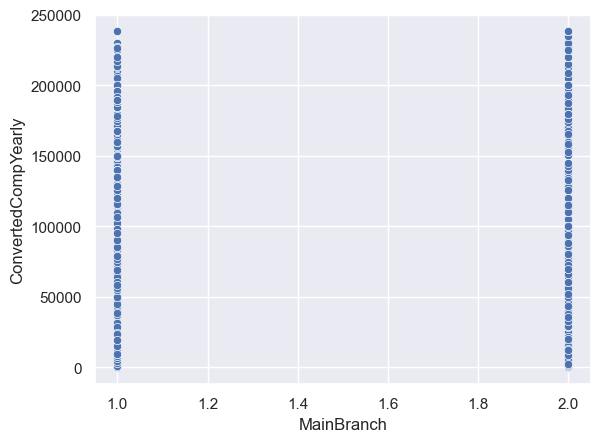

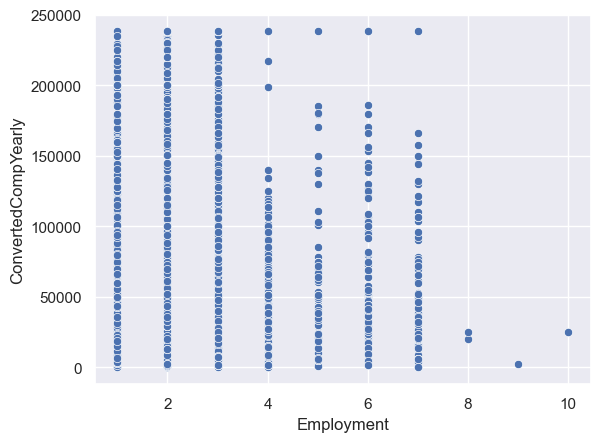

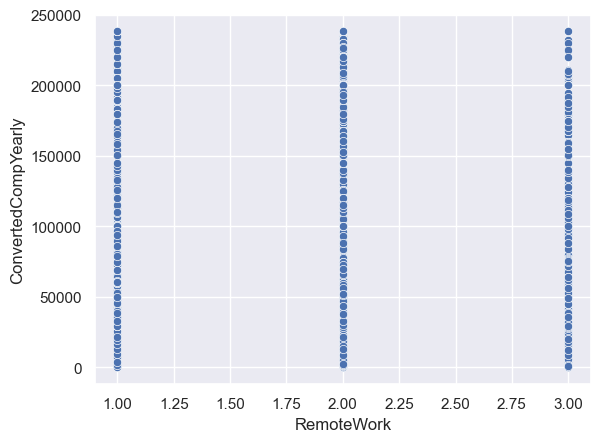

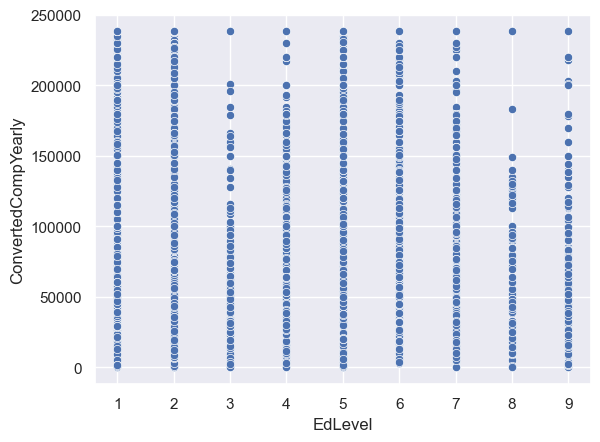

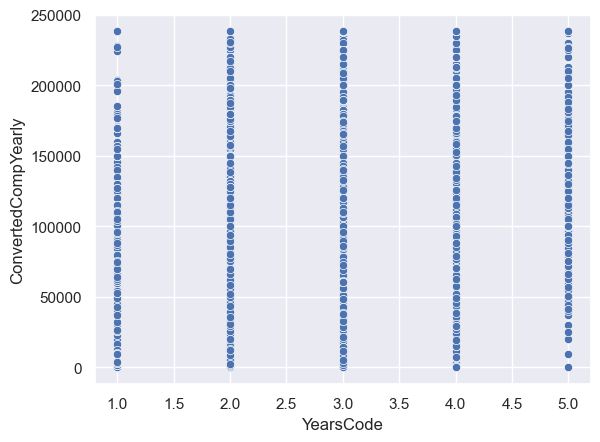

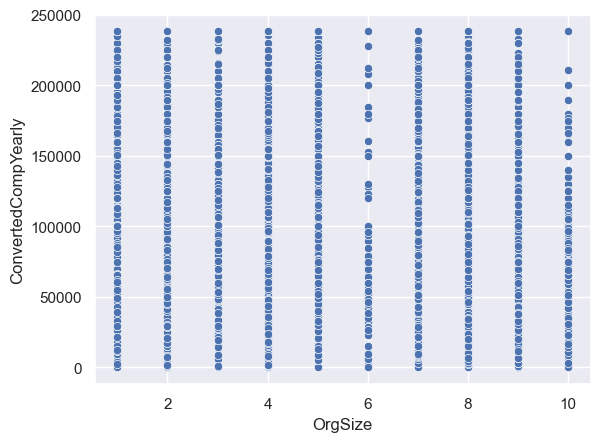

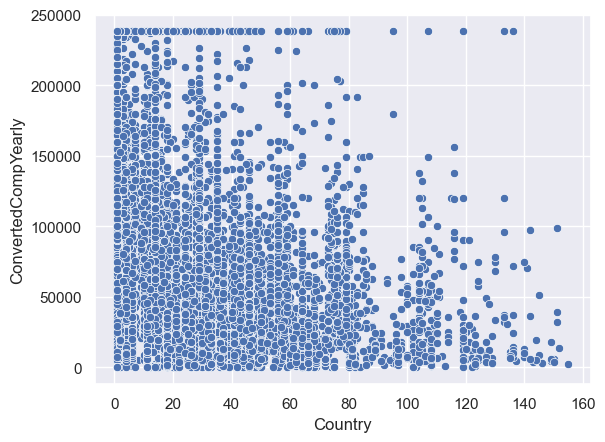

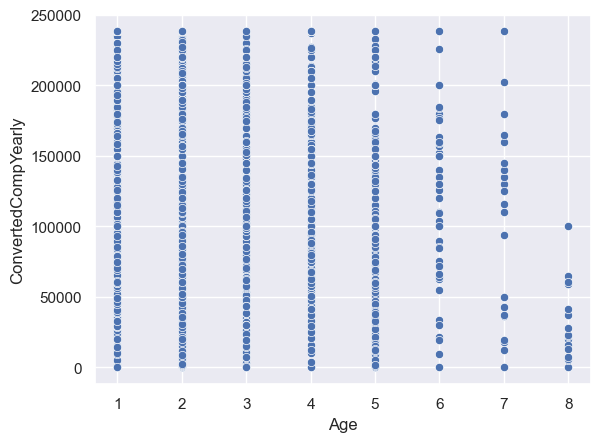

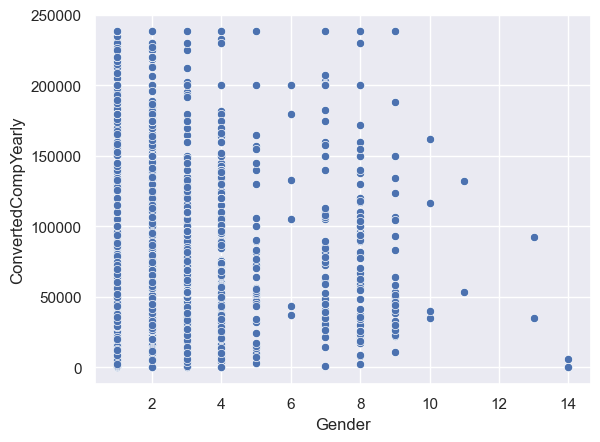

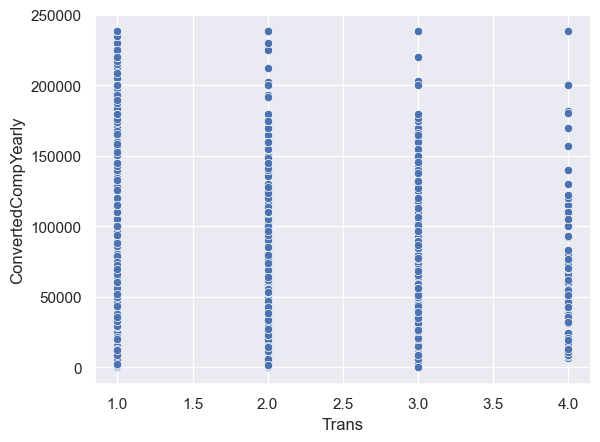

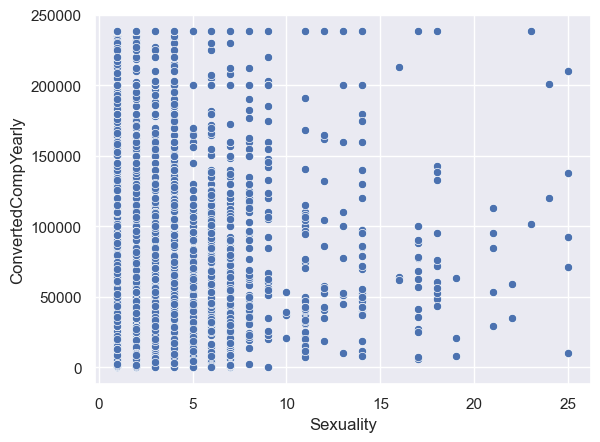

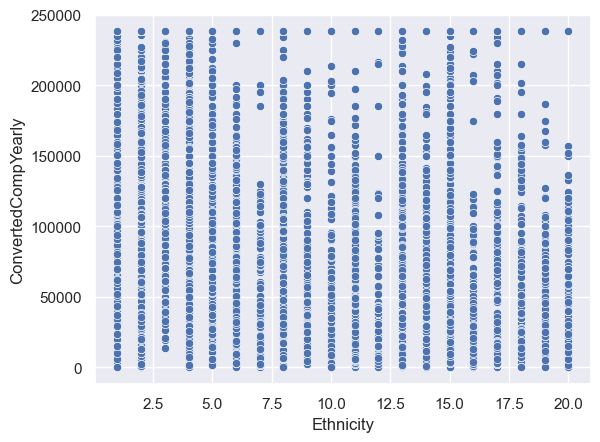

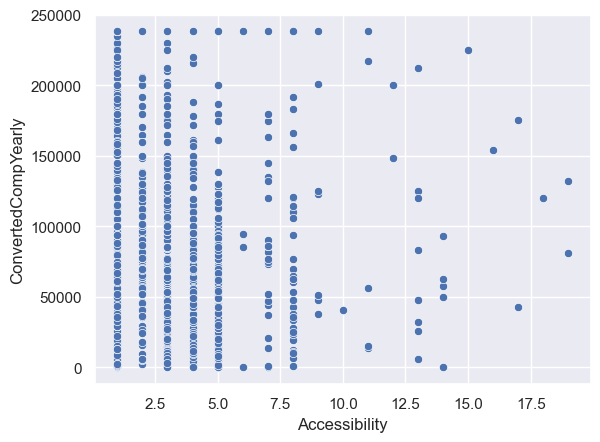

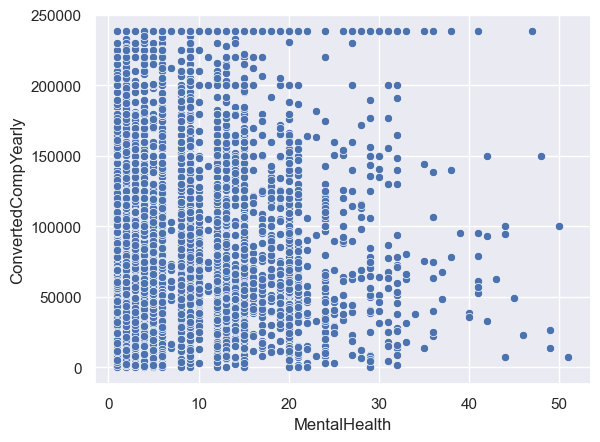

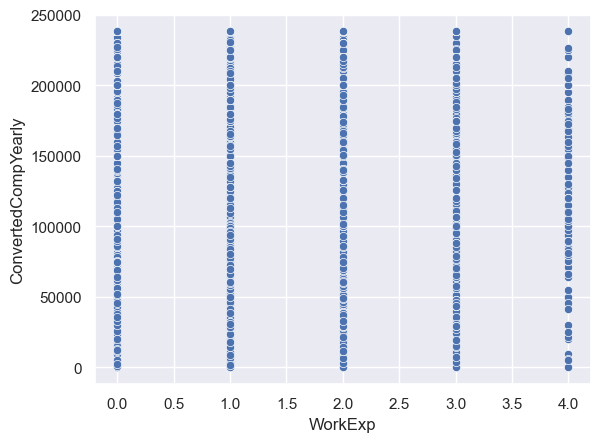

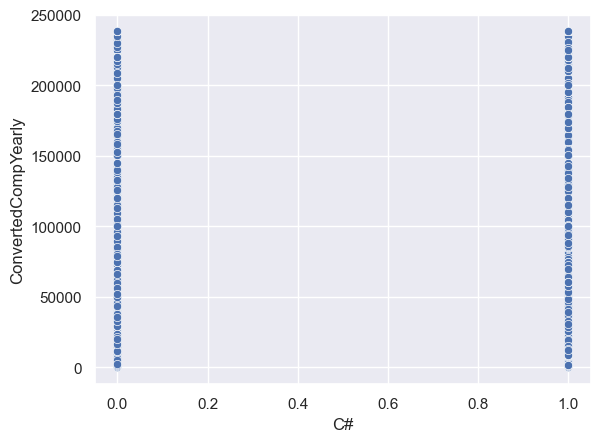

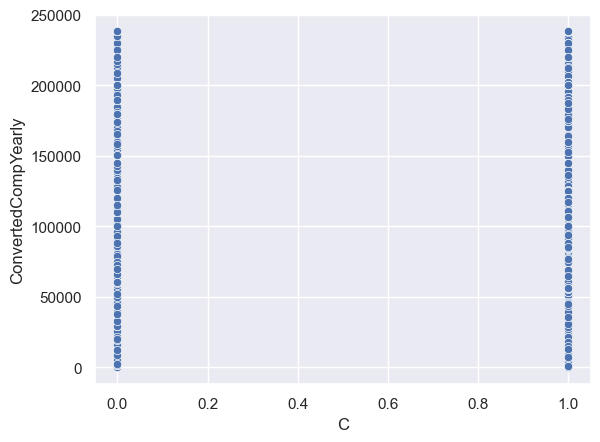

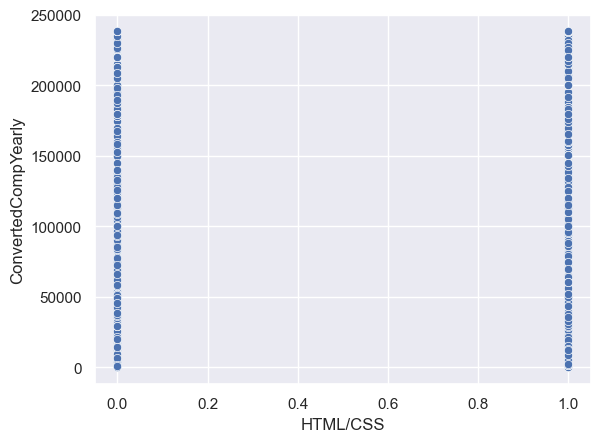

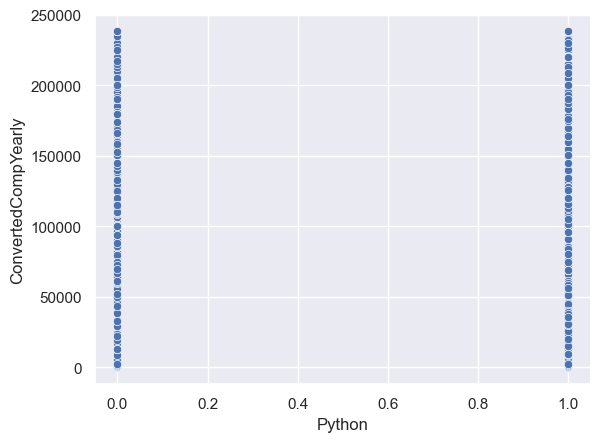

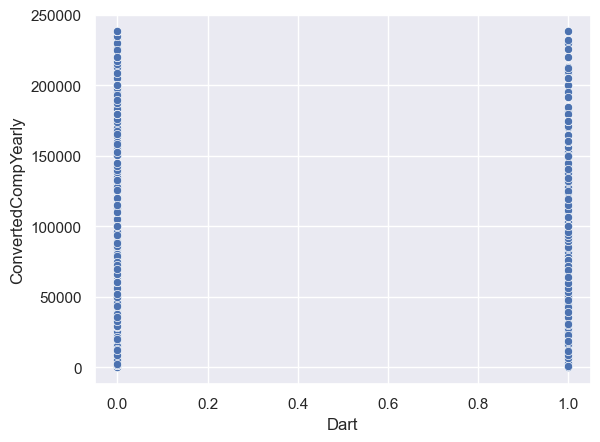

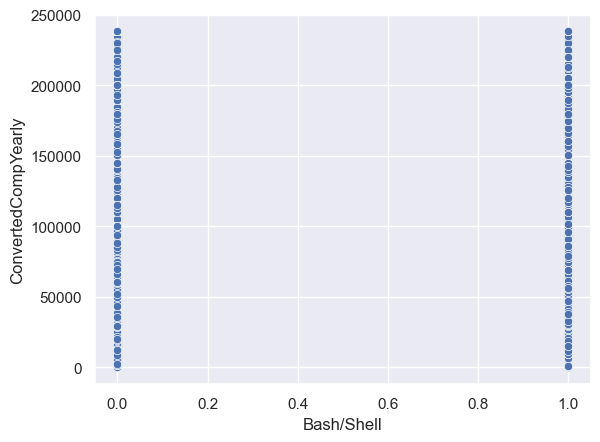

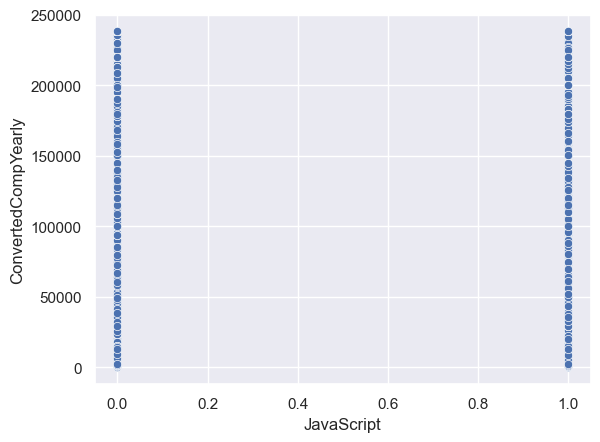

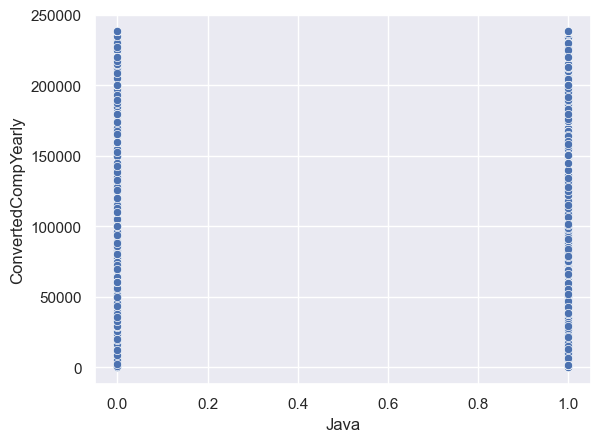

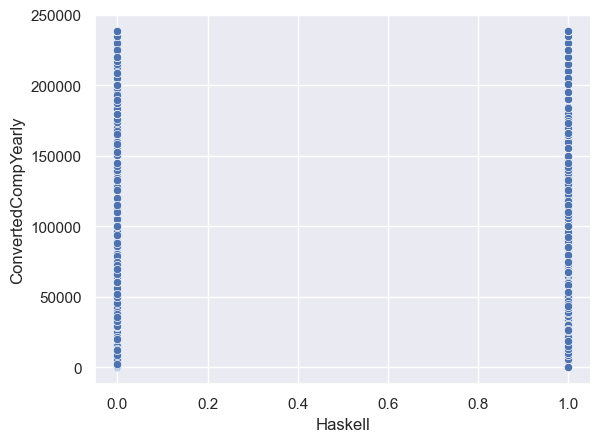

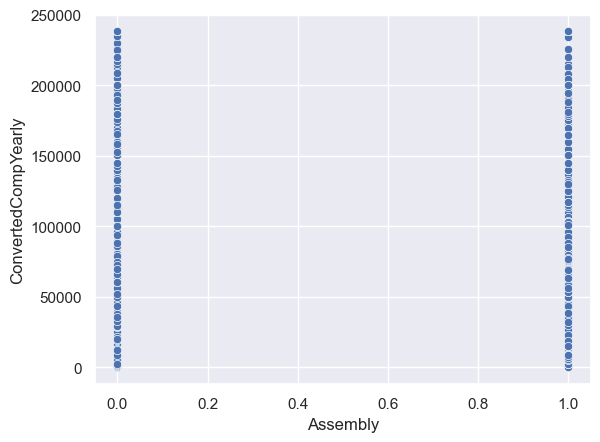

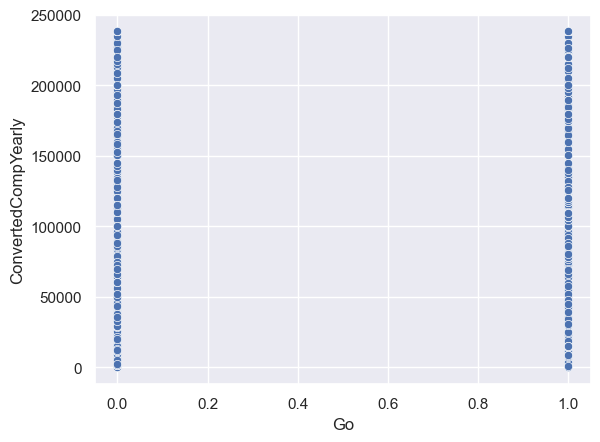

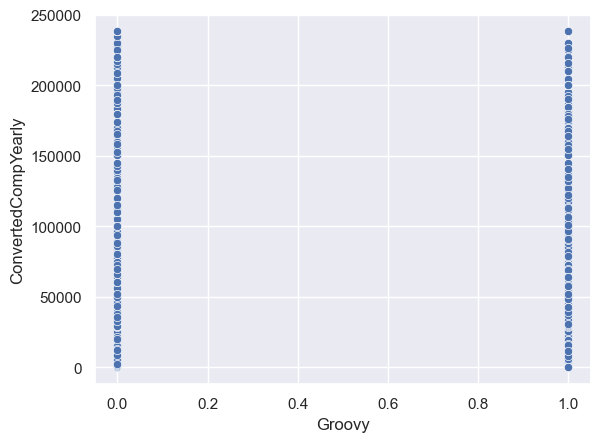

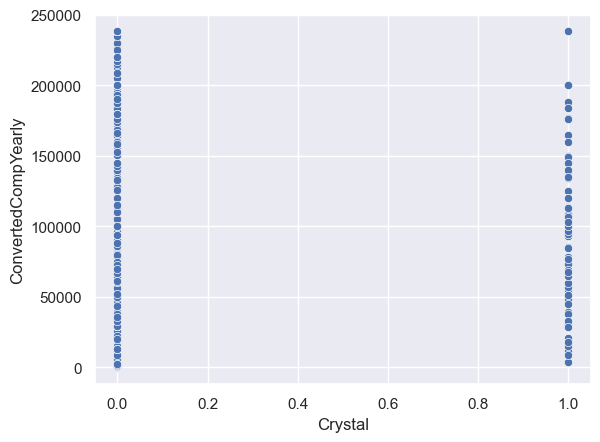

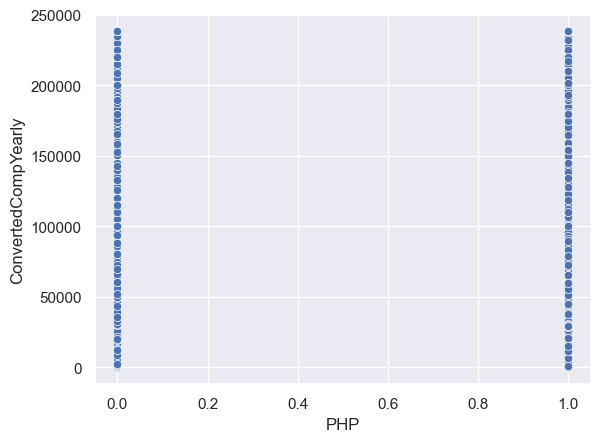

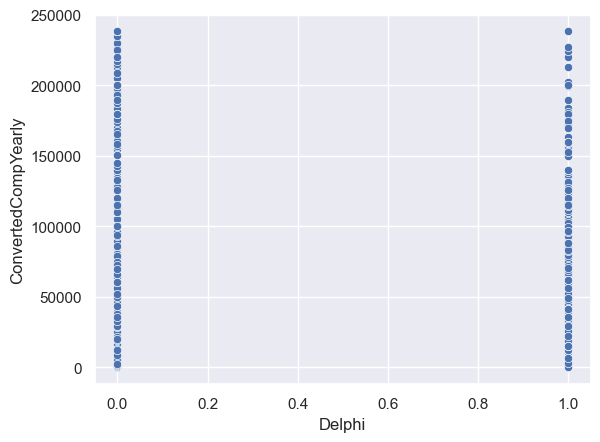

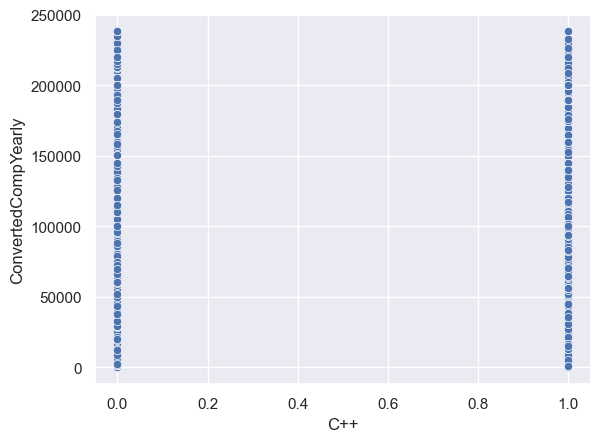

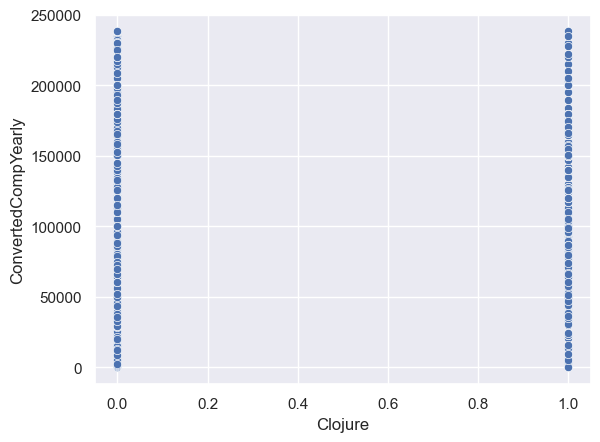

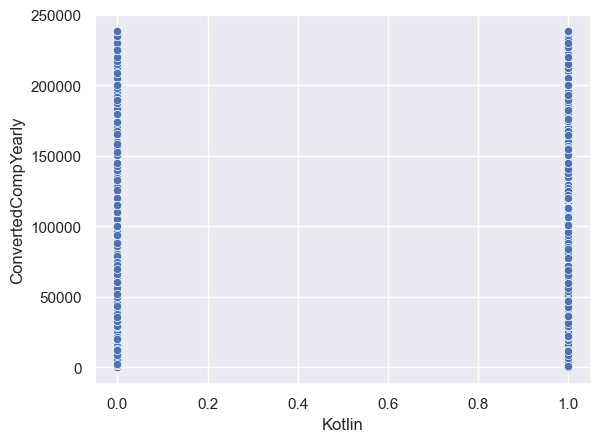

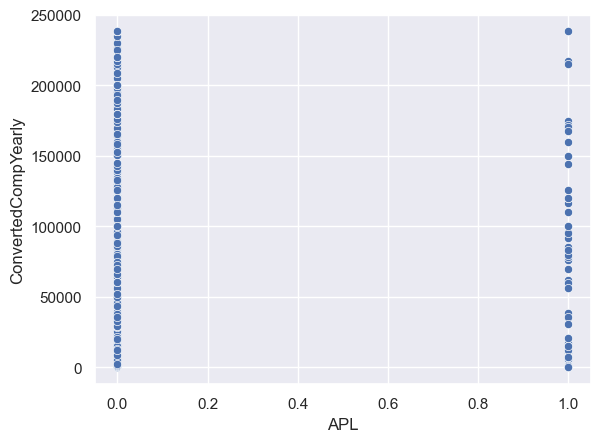

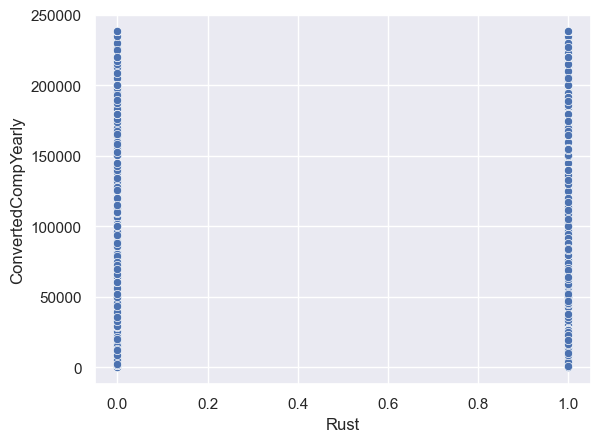

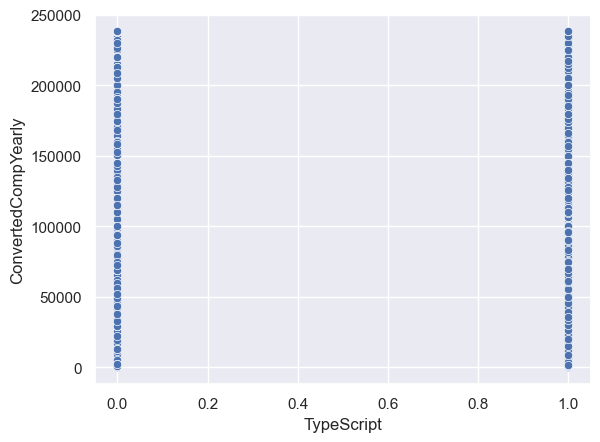

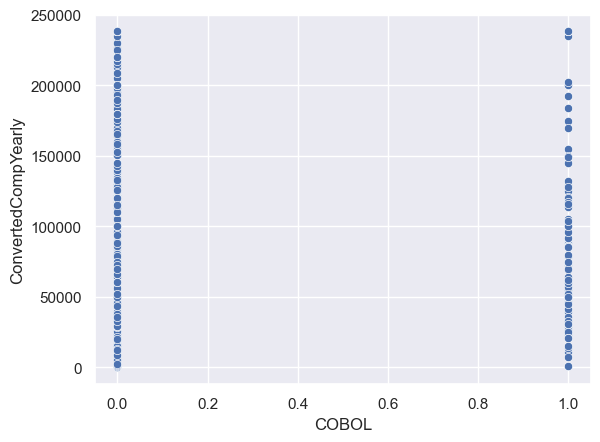

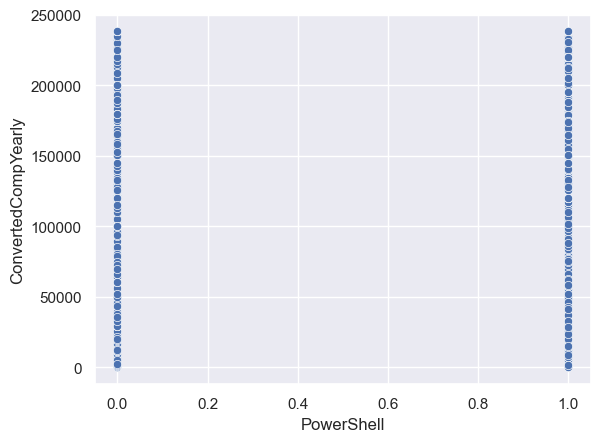

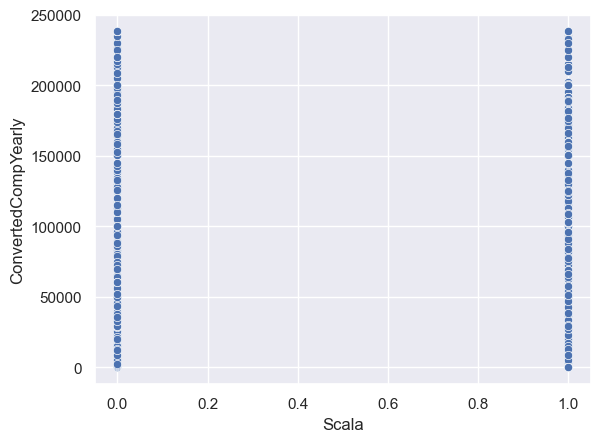

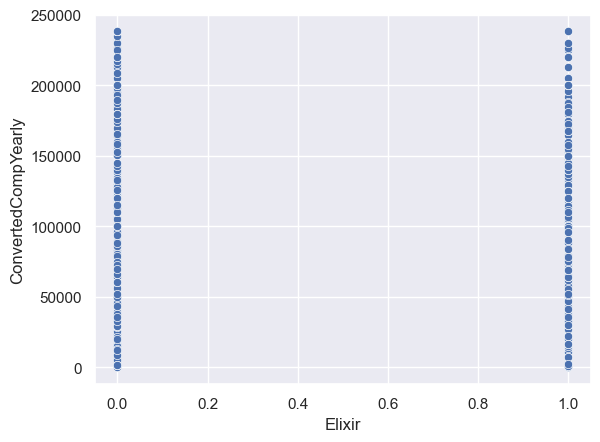

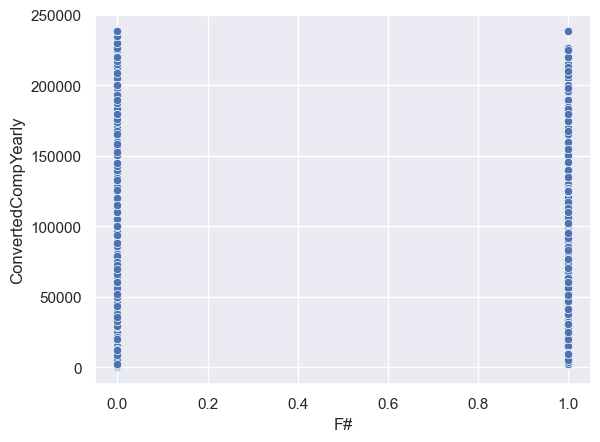

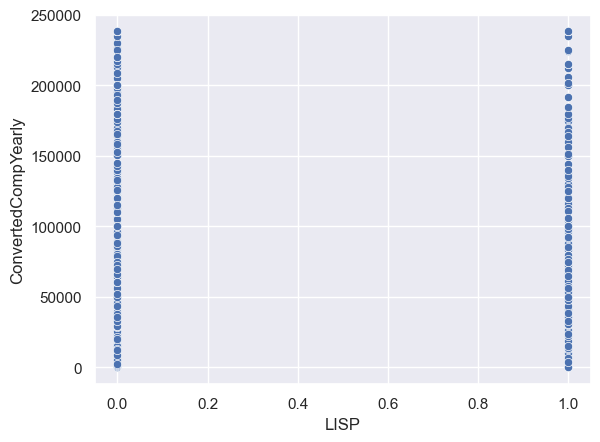

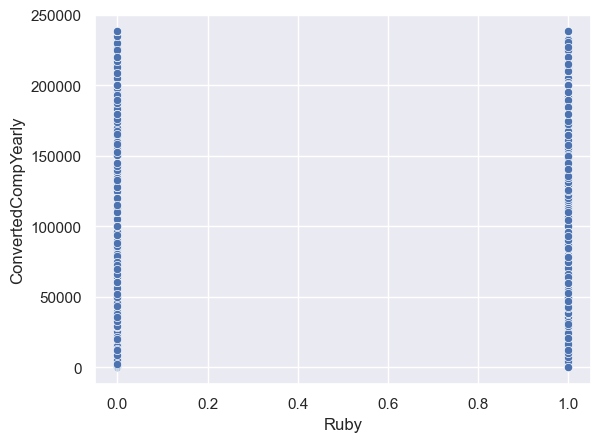

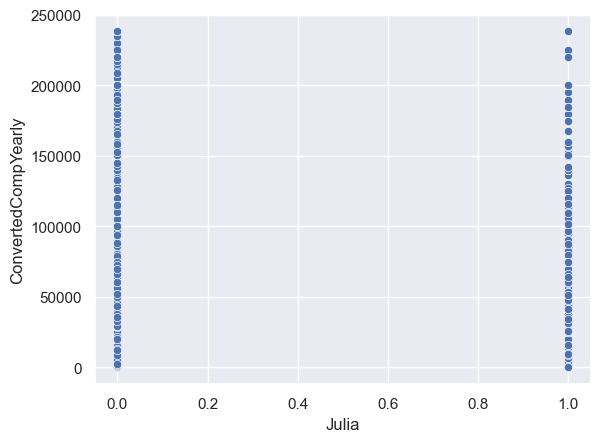

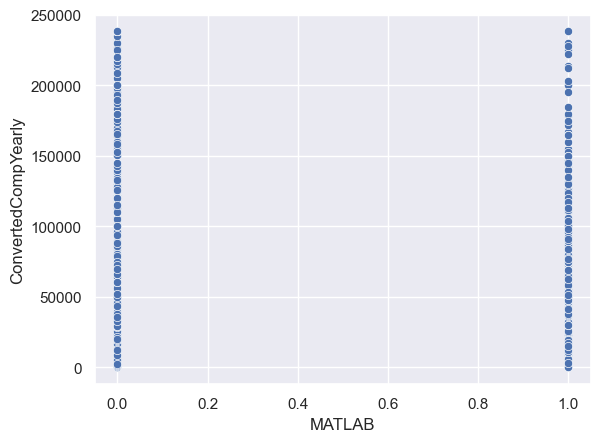

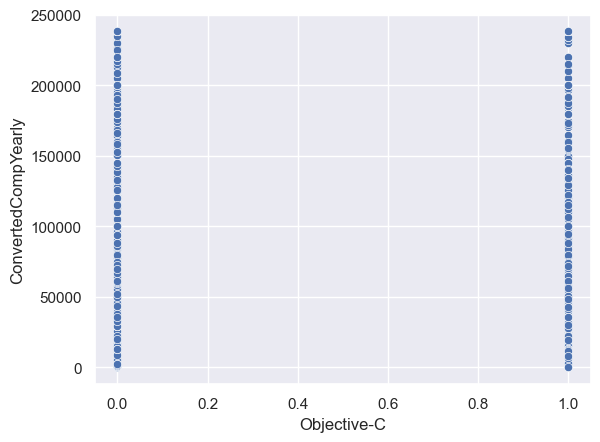

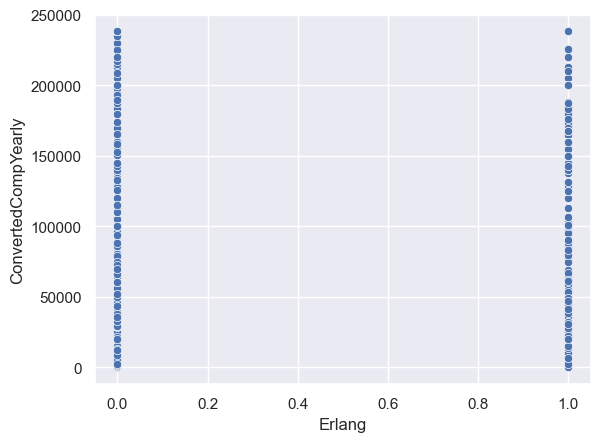

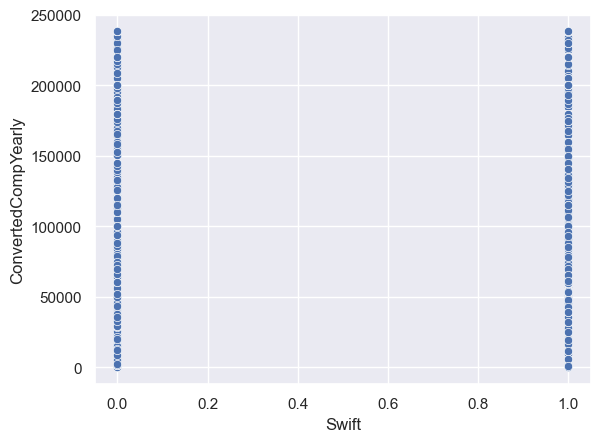

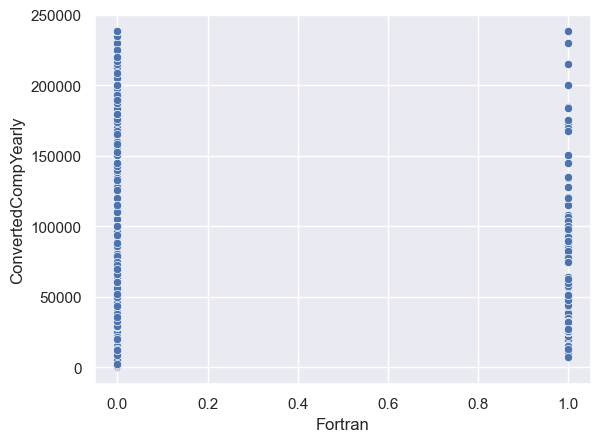

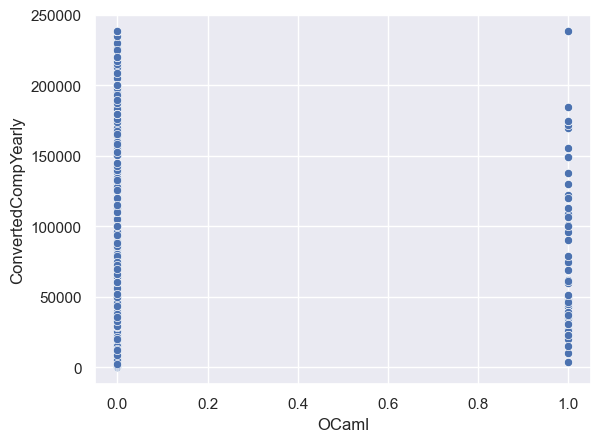

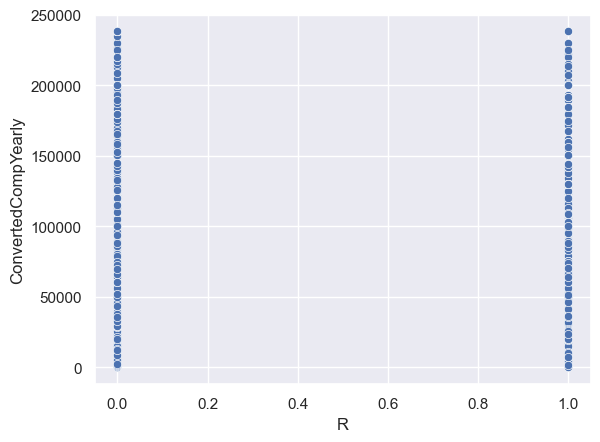

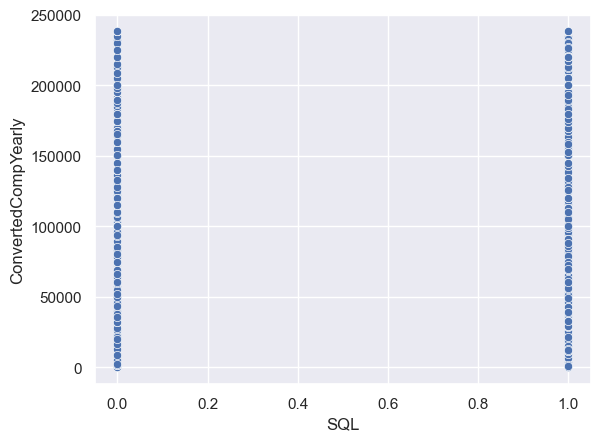

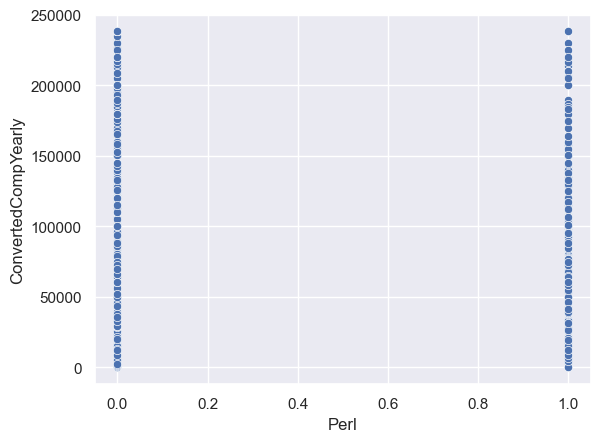

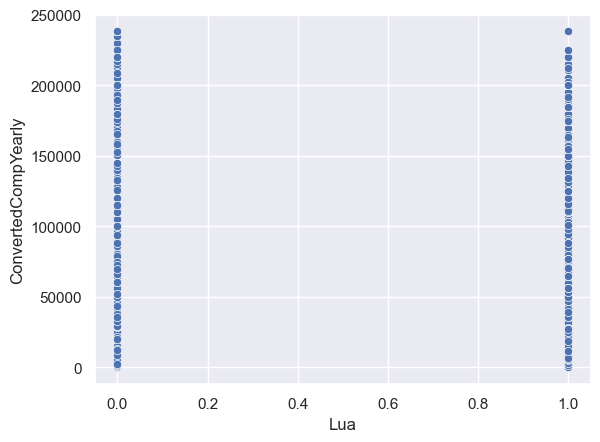

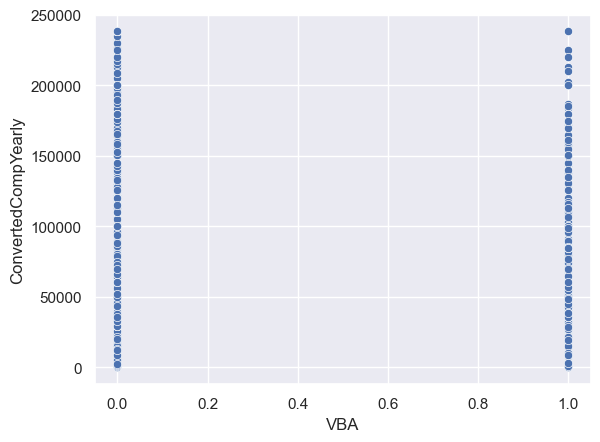

In [133]:
for i in ['MainBranch','Employment','RemoteWork','EdLevel','YearsCode','OrgSize','Country','Age','Gender','Trans','Sexuality','Ethnicity','Accessibility','MentalHealth','WorkExp','C#','C','HTML/CSS','Python','Dart','Bash/Shell','JavaScript','Java','Haskell','Assembly','Go','Groovy','Crystal','PHP','Delphi','C++','Clojure','Kotlin','APL','Rust','TypeScript','COBOL','PowerShell','Scala','Elixir','F#','LISP','Ruby','Julia','MATLAB','Objective-C','Erlang','Swift','Fortran','OCaml','R','SQL','Perl','Lua','VBA']:
    sns.scatterplot(data = df, x = i, y = 'ConvertedCompYearly')
    plt.show()

# Let's see the correlation with heat map

<Axes: >

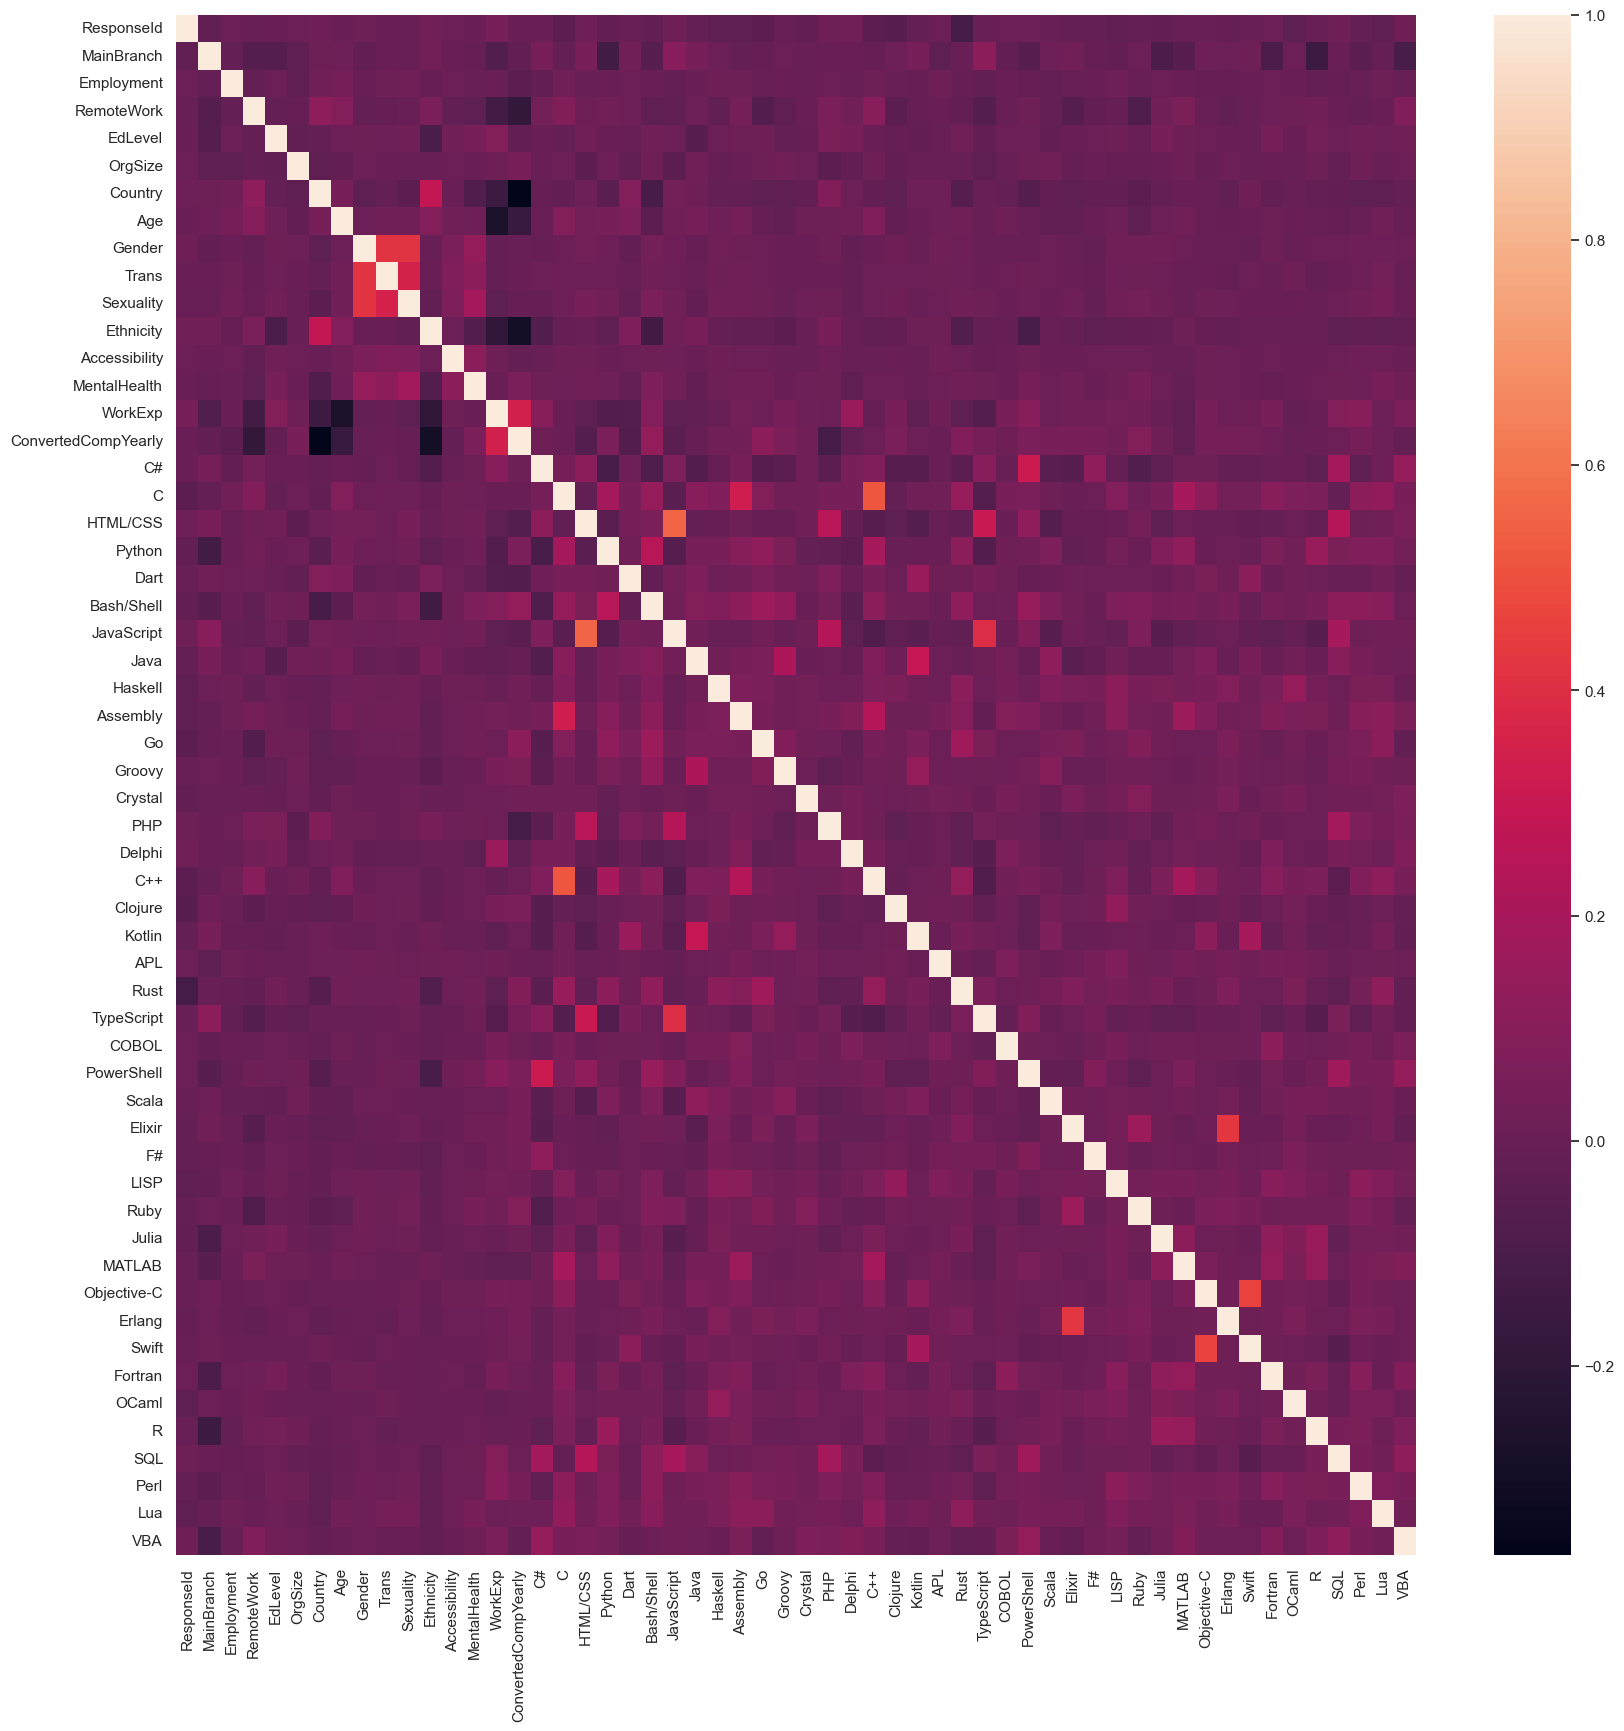

In [134]:
s = df.select_dtypes(include = "number").corr()
plt.figure(figsize = (20,20))
sns.heatmap(s)

<Axes: >

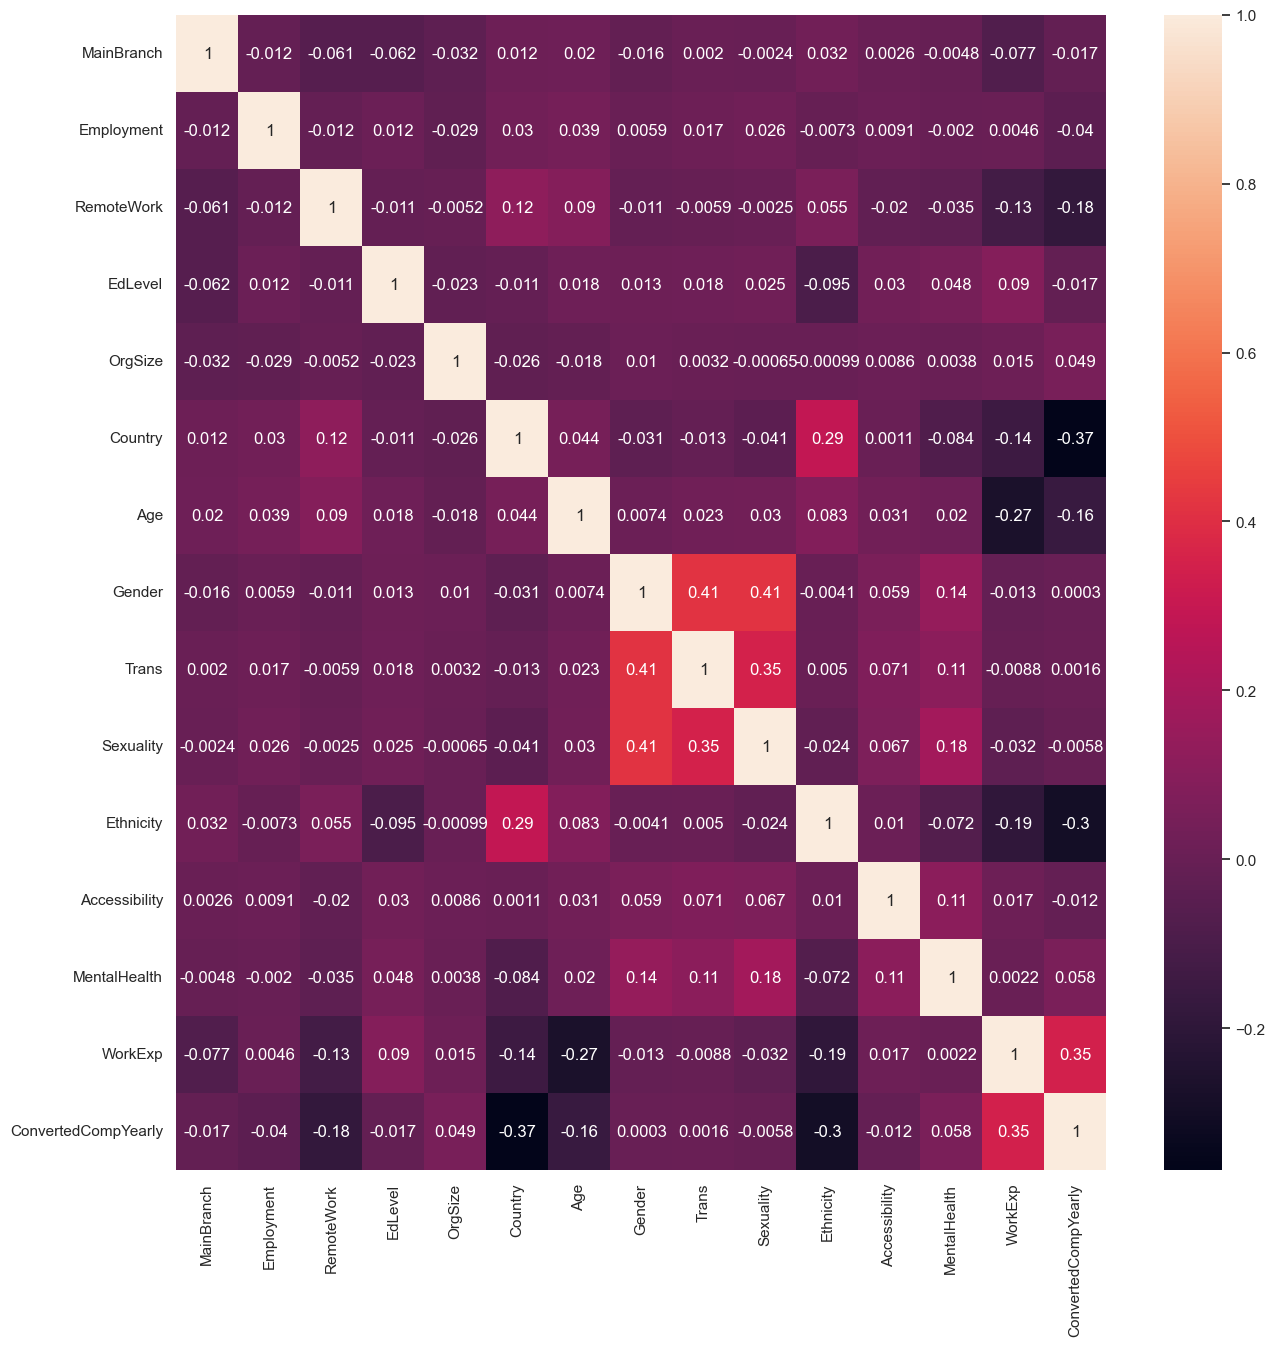

In [135]:
# let's do heatmap without languages

df_2 = df[['MainBranch','Employment','RemoteWork','EdLevel','YearsCode','OrgSize','Country','Age','Gender','Trans','Sexuality','Ethnicity','Accessibility','MentalHealth','WorkExp', 'ConvertedCompYearly']]
s = df_2.select_dtypes(include = "number").corr()
plt.figure(figsize = (15,15))
sns.heatmap(s, annot = True)